# Sustainable energy transitions data model

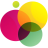

In [2]:
from IPython.core.display import Image 
Image('favicon.png') 

In [3]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np, json, copy
%matplotlib inline
plt.style.use('ggplot')
#plt.style.use('seaborn-darkgrid')
#import mpld3
#mpld3.enable_notebook()

In [4]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

## Country and region name converters

In [5]:
#country name converters

#EIA->pop
clist1={'North America':'Northern America',
'United States':'United States of America',
'Central & South America':'Latin America and the Caribbean',
'Bahamas, The':'Bahamas',
'Saint Vincent/Grenadines':'Saint Vincent and the Grenadines',
'Venezuela':'Venezuela (Bolivarian Republic of)',
'Macedonia':'The former Yugoslav Republic of Macedonia',
'Moldova':'Republic of Moldova',
'Russia':'Russian Federation',
'Iran':'Iran (Islamic Republic of)',
'Palestinian Territories':'State of Palestine',
'Syria':'Syrian Arab Republic',
'Yemen':'Yemen ',
'Congo (Brazzaville)':'Congo',
'Congo (Kinshasa)':'Democratic Republic of the Congo',
'Cote dIvoire (IvoryCoast)':"C\xc3\xb4te d'Ivoire",
'Gambia, The':'Gambia',
'Libya':'Libyan Arab Jamahiriya',
'Reunion':'R\xc3\xa9union',
'Somalia':'Somalia ',
'Sudan and South Sudan':'Sudan',
'Tanzania':'United Republic of Tanzania',
'Brunei':'Brunei Darussalam',
'Burma (Myanmar)':'Myanmar',
'Hong Kong':'China, Hong Kong Special Administrative Region',
'Korea, North':"Democratic People's Republic of Korea",
'Korea, South':'Republic of Korea',
'Laos':"Lao People's Democratic Republic",
'Macau':'China, Macao Special Administrative Region',
'Timor-Leste (East Timor)':'Timor-Leste',
'Virgin Islands,  U.S.':'United States Virgin Islands',
'Vietnam':'Viet Nam'}

#BP->pop
clist2={u'                 European Union #':u'Europe',
u'Rep. of Congo (Brazzaville)':u'Congo (Brazzaville)',
'Republic of Ireland':'Ireland',
'China Hong Kong SAR':'China, Hong Kong Special Administrative Region',
u'Total Africa':u'Africa',
u'Total North America':u'Northern America',
u'Total S. & Cent. America':'Latin America and the Caribbean',
u'Total World':u'World',
u'Total World ':u'World',
'South Korea':'Republic of Korea',
u'Trinidad & Tobago':u'Trinidad and Tobago',
u'US':u'United States of America'}

#WD->pop
clist3={u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Congo, Rep.':u'Congo (Brazzaville)',
u'Caribbean small states':'Carribean',
u'East Asia & Pacific (all income levels)':'Eastern Asia',
u'Egypt, Arab Rep.':'Egypt',
u'European Union':u'Europe',
u'Hong Kong SAR, China':u'China, Hong Kong Special Administrative Region',
u'Iran, Islamic Rep.':u'Iran (Islamic Republic of)',
u'Kyrgyz Republic':u'Kyrgyzstan',
u'Korea, Rep.':u'Republic of Korea',
u'Latin America & Caribbean (all income levels)':'Latin America and the Caribbean',
u'Macedonia, FYR':u'The former Yugoslav Republic of Macedonia',
u'Korea, Dem. Rep.':u"Democratic People's Republic of Korea",
u'South Asia':u'Southern Asia',
u'Sub-Saharan Africa (all income levels)':u'Sub-Saharan Africa',
u'Slovak Republic':u'Slovakia',
u'Venezuela, RB':u'Venezuela (Bolivarian Republic of)',
u'Yemen, Rep.':u'Yemen ',
u'Congo, Dem. Rep.':u'Democratic Republic of the Congo'}

#COMTRADE->pop
clist4={u"Bosnia Herzegovina":"Bosnia and Herzegovina",
u'Central African Rep.':u'Central African Republic',
u'China, Hong Kong SAR':u'China, Hong Kong Special Administrative Region',
u'China, Macao SAR':u'China, Macao Special Administrative Region',
u'Czech Rep.':u'Czech Republic',
u"Dem. People's Rep. of Korea":"Democratic People's Republic of Korea",
u'Dem. Rep. of the Congo':"Democratic Republic of the Congo",
u'Dominican Rep.':u'Dominican Republic',
u'Fmr Arab Rep. of Yemen':u'Yemen ',
u'Fmr Ethiopia':u'Ethiopia',
u'Fmr Fed. Rep. of Germany':u'Germany',
u'Fmr Panama, excl.Canal Zone':u'Panama',
u'Fmr Rep. of Vietnam':u'Viet Nam',
u"Lao People's Dem. Rep.":u"Lao People's Democratic Republic",
u'Occ. Palestinian Terr.':u'State of Palestine',
u'Rep. of Korea':u'Republic of Korea',
u'Rep. of Moldova':u'Republic of Moldova',
u'Serbia and Montenegro':u'Serbia',
u'US Virgin Isds':u'United States Virgin Islands',
u'Solomon Isds':u'Solomon Islands',
u'United Rep. of Tanzania':u'United Republic of Tanzania',
u'TFYR of Macedonia':u'The former Yugoslav Republic of Macedonia',
u'USA':u'United States of America',
u'USA (before 1981)':u'United States of America',
}

#Jacobson->pop
clist5={u"Korea, Democratic People's Republic of":"Democratic People's Republic of Korea",
u'All countries':u'World',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Iran, Islamic Republic of':u'Iran (Islamic Republic of)',
u'Macedonia, Former Yugoslav Republic of':u'The former Yugoslav Republic of Macedonia',
u'Congo, Democratic Republic of':u"Democratic Republic of the Congo",
u'Korea, Republic of':u'Republic of Korea',
u'Tanzania, United Republic of':u'United Republic of Tanzania',
u'Moldova, Republic of':u'Republic of Moldova',
u'Hong Kong, China':u'China, Hong Kong Special Administrative Region',
u'All countries.1':"World"
}

#NREL solar->pop
clist6={u"Antigua & Barbuda":u'Antigua and Barbuda',
u"Bosnia & Herzegovina":u"Bosnia and Herzegovina",
u"Brunei":u'Brunei Darussalam',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u"Iran":u'Iran (Islamic Republic of)',
u"Laos":u"Lao People's Democratic Republic",
u"Libya":'Libyan Arab Jamahiriya',
u"Moldova":u'Republic of Moldova',
u"North Korea":"Democratic People's Republic of Korea",
u"Reunion":'R\xc3\xa9union',
u'Sao Tome & Principe':u'Sao Tome and Principe',
u'Solomon Is.':u'Solomon Islands',
u'St. Lucia':u'Saint Lucia',
u'St. Vincent & the Grenadines':u'Saint Vincent and the Grenadines',
u'The Bahamas':u'Bahamas',
u'The Gambia':u'Gambia',
u'Virgin Is.':u'United States Virgin Islands',
u'West Bank':u'State of Palestine'
}

#NREL wind->pop
clist7={u"Antigua & Barbuda":u'Antigua and Barbuda',
u"Bosnia & Herzegovina":u"Bosnia and Herzegovina",
u'Occupied Palestinian Territory':u'State of Palestine',
u'China Macao SAR':u'China, Macao Special Administrative Region',
#"C\xc3\xb4te d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'East Timor':u'Timor-Leste',
u'TFYR Macedonia':u'The former Yugoslav Republic of Macedonia',
u'IAM-country Total':u'World'
}

#country entroids->pop
clist8={u'Burma':'Myanmar',
u"Cote d'Ivoire":"C\xc3\xb4te d'Ivoire",
u'Republic of the Congo':u'Congo (Brazzaville)',
u'Reunion':'R\xc3\xa9union'
}

def cnc(country):
    if country in clist1: return clist1[country]
    elif country in clist2: return clist2[country]
    elif country in clist3: return clist3[country]
    elif country in clist4: return clist4[country]
    elif country in clist5: return clist5[country]
    elif country in clist6: return clist6[country]
    elif country in clist7: return clist7[country]
    elif country in clist8: return clist8[country]
    else: return country

# Population

Consult the notebook entitled *pop.ipynb* for the details of mining the data from the UN statistics division online database.   
Due to being the reference database for country names cell, the cell below needs to be run first, before any other databases.

In [6]:
#pop_path='https://dl.dropboxusercontent.com/u/531697/datarepo/Set/db/
pop_path='E:/Dropbox/Public/datarepo/Set/db/'

In [7]:
#population data
pop=pd.read_csv(pop_path+'pop.csv').set_index(['Country','Year']).unstack(level=1)
pop.head()

Value                                                    \
Year           1950.0    1951.0    1952.0    1953.0    1954.0    1955.0   
Country                                                                   
Afghanistan    7451.0    7547.0    7651.0    7763.0    7882.0    8010.0   
Africa       228827.0  233364.0  238148.0  243180.0  248460.0  253988.0   
Albania        1214.0    1243.0    1276.0    1311.0    1350.0    1390.0   
Algeria        8872.0    9059.0    9253.0    9459.0    9680.0    9917.0   
Angola         4148.0    4220.0    4297.0    4378.0    4460.0    4543.0   

                                                       ...                 \
Year           1956.0    1957.0    1958.0    1959.0    ...         2091.0   
Country                                                ...                  
Afghanistan    8146.0    8290.0    8443.0    8604.0    ...        61322.0   
Africa       259762.0  265780.0  272039.0  278537.0    ...      3933881.0   
Albania        1433.0    1477.0    1523.0    1570.0    ...         2329.0   
Algeria       10170.0   10436.0   10713.0   10995.0    ...        55613.0   
Angola         4626.0    4709.0    4793.0    4878.0    ...        91993.0   

                                                                               \
Year            2092.0     2093.0     2094.0     2095.0     2096.0     2097.0   
Country                                                                         
Afghanistan    61112.0    60897.0    60676.0    60449.0    60218.0    59982.0   
Africa       3963991.0  3993557.0  4022570.0  4051019.0  4078898.0  4106198.0   
Albania         2314.0     2299.0     2285.0     2272.0     2260.0     2248.0   
Algeria        55561.0    55501.0    55433.0    55357.0    55275.0    55186.0   
Angola         92654.0    93297.0    93924.0    94534.0    95127.0    95704.0   

                                              
Year            2098.0     2099.0     2100.0  
Country                                       
Afghanistan    59741.0    59497.0    59249.0  
Africa       4132914.0  4159041.0  4184577.0  
Albania         2237.0     2226.0     2217.0  
Algeria        55091.0    54992.0    54887.0  
Angola         96264.0    96809.0    97337.0  

[5 rows x 151 columns]

# Define database parsers and units

In [8]:
#initialize data and constants
data={}
countries={i for i in pop.index}
years={int(i[1]) for i in pop.columns}
dbs={'bp','eia'}
datatypes={'prod','cons','emi','res'}
allfuels=['oil','coal','gas','nuclear','biofuels','hydro','geo_other','solar','wind']
fossils=['oil','coal','gas']+['nrg','nrg_sum']
transp=1 #transparency
#colorlist=np.array([[166,86,40,transp*255],[153,153,153,transp*255],[152,78,163,transp*255],
#                    [228,26,28,transp*255],[247,129,191,transp*255],[55,126,184,transp*255],
#                    [82,56,65,transp*255],[255,255,51,transp*255],[77,175,74,transp*255]])/255.0
colorlist=np.array([[131,13,9,transp*255],[85,20,52,transp*255],[217,20,14,transp*255],
                    [213,9,98,transp*255],[64,185,85,transp*255],[202,200,46,transp*255],
                    [106,23,9,transp*255],[251,212,31,transp*255],[112,133,16,transp*255]])/255.0
gcolors={allfuels[i]:colorlist[i] for i in range(len(allfuels))}

def reset(what='all',datatype='all'):
    global data
    if what=='all':
        #reset all values of database
        fuels=allfuels+['nrg','nrg_sum']
        data={i:{int(k[1]):{'energy':{j:{k:{l:np.NaN for l in dbs} for k in datatypes}\
                              for j in fuels},'population':long(pop.loc[i][k])*1000,\
                                              'consumer_efficiency':0.5,\
                                              'cumulative_emissions':0}\
                              for k in pop.columns}\
                              #we use population as the default database for country names
                              for i in pop.index} 
    else:
        countries=data.keys()
        for i in countries:
            for j in years:
                if datatype=='all':
                    data[i][j]['energy'][what]={k:{l:np.NaN for l in dbs} for k in datatypes}
                else:
                    data[i][j]['energy'][what][datatype]={l:np.NaN for l in dbs}

reset()

kbpd_to_TWh=365.25*0.001628200 #unit conversion from thousand barrels of oil per day to TWh per year
Gboe_to_TWh=1628.2 #unit conversion from thousand million barrels of oil to TWh
EJ_to_TWh=277.77 #unit conversion from exa Joule to TWh
bcf_to_TWh=0.2931 #unit conversion from billion cubic feet of natural gas to TWh
tcf_to_TWh=bcf_to_TWh*1000.0 #unit conversion from trillion cubic feet of natural gas to TWh
qbtu_to_TWh=293.297222 #unit conversion from quadrillion British thermal units to TWh
mtoe_to_TWh=11.63 #unit conversion million metric tons of oil equivalent to TWh
kgge_to_gm3=1.49 #unit conversion from kilogram of natural gas to cubic meter, based on CH4
mtlnge_to_TWh=14.45 #unit conversion million metric tons of gas (LNG) equivalent to TWh
cm_to_cf=35.3 #unit conversion from million cubic meters to million cubic feet
tcm_to_TWh=tcf_to_TWh*cm_to_cf #unit conversion from trillion cubic meters of natural gas to TWh
kgge_to_TWh=kgge_to_gm3*tcf_to_TWh*cm_to_cf*1e-18 #unit conversion from kilogram of natural gas to TWh
#mtge_to_TWh=kgge_to_gm3*tcf_to_TWh*cm_to_cf*1e-9 #unit conversion from kilogram of natural gas to TWh
mtge_to_GJ=53.6
mtge_to_TWh=mtge_to_GJ*1e-9*EJ_to_TWh
t_to_st=1.10231 #unit conversion from metric ton to short ton
tcoe_to_toe=0.7 #unit conversion from metric tons of coal equivalent to metric tons of oil equivalent
mtcoe_to_TWh=tcoe_to_toe*mtoe_to_TWh #unit conversion million metric tons of coal equivalent to TWh
#mtcoe_to_TWh=8.141
mstcoe_to_TWh=mtcoe_to_TWh*t_to_st #unit conversion million metric short tons of coal equivalent to TWh
c_to_co2=44.0/12 #unit conversion from C to CO2 mass

carbon_budget=840*c_to_co2 #840 GtC as per http://www.ipcc.ch/report/ar5/wg1/

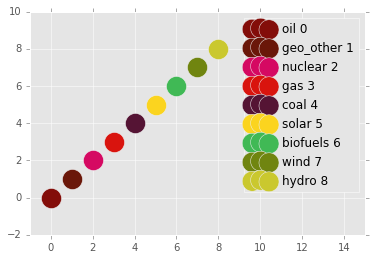

In [9]:
#colortester
for i,d in enumerate(gcolors):
    plt.scatter(i,i,400,c=gcolors[d],label=d+' '+str(i))
    #print np.array(gcolors[d])*255,d
plt.xlim(-1,15)
plt.legend()

In [10]:
path = 2 #set database path
#online path = 0
#backup path = 1
#local path  = 2

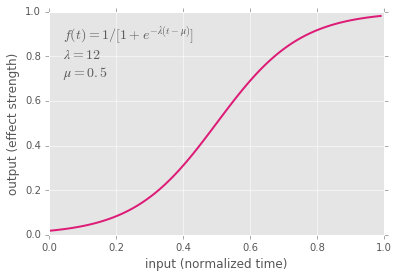

In [11]:
def scurve(x):
    lamda=8 #curve steepness control
    mu=0.5
    return 1/(1+np.exp(-lamda*(x-mu)))
x=np.arange(100)/100.0
plt.plot(x,[scurve(i) for i in x],c='#dd1c77',lw=2)
plt.xlabel('input (normalized time)')
plt.ylabel('output (effect strength)')
plt.text(0.04, 0.95, u'$f(t)=1/[1+e^{-λ(t-μ)}]$\n$λ=12$\n$μ=0.5$',
    horizontalalignment='left',
    verticalalignment='top',size=14,alpha=0.6)
plt.show()

In [12]:
cc=pd.read_excel(pop_path+'Country Code and Name ISO2 ISO3.xls')
#http://unstats.un.org/unsd/tradekb/Attachment321.aspx?AttachmentType=1

In [13]:
ccs=cc['Country Code'].values

In [14]:
neighbors=pd.read_csv(pop_path+'contry-geotime.csv')
#https://raw.githubusercontent.com/ppKrauss/country-geotime/master/data/contry-geotime.csv

In [15]:
#country name converter from iso to comtrade and back
iso2c={}
isoc2={}
for i in cc.T.iteritems():
    iso2c[i[1][0]]=i[1][1]
    isoc2[i[1][1]]=i[1][0]

In [16]:
#country name converter from pop to iso
pop2iso={}
for i in cc.T.iteritems():
    pop2iso[cnc(i[1][1])]=int(i[1][0])

In [17]:
#country name converter from alpha 2 to iso
c2iso={}
for i in neighbors.T.iteritems():
    c2iso[str(i[1][0])]=i[1][1]
c2iso['NA']=c2iso['nan'] #adjust for namibia
c2iso.pop('nan');

In [18]:
#create country neighbor adjacency list based on iso country number codes
c2neighbors={}
for i in neighbors.T.iteritems():
    z=str(i[1][4]).split(' ')
    if (str(i[1][1])!='nan'): c2neighbors[int(i[1][1])]=[c2iso[k] for k in z if k!='nan']

## Read, process & convert renewable resource maps

In [19]:
solar=pd.read_excel(pop_path+'maps/nrelsolar.xlsx',sheetname='DNI')
#http://en.openei.org/doe-opendata/dataset/19316a50-e55d-45e2-b692-efcebfe16c95/resource/3e72f32a-7de1-4e5d-a25a-76928769625f/download/solarresourceenergy.xlsx
solar_res={}
solar_cf={}
for i in solar.T.iteritems():
    country=cnc(i[1][0])
    if i[0]<10: #record capacity factors
        solar_cf[i[1][9]]=i[1][10]
    if country in data:
        if country not in solar_res:solar_res[country]={}
        clas=i[1][1]
        cap=i[1][5]/1000.0 #workbook doest not import commas correctly, fix
        solar_res[country][clas]=cap

In [20]:
#extrapolate
keyplotter(solar_cf)
helper=interpolate(solar_cf,range(0,15),1,1,2,True,True)
keyplotter(helper)
solar_cf.update(helper)

NameError: name 'keyplotter' is not defined

In [ ]:
plt.bar(solar_res['United States of America'].keys(),solar_res['United States of America'].values())
plt.ylabel('avail energy [Twh/year]')
plt.title('DNI-based solar thermal power\nwith 6 hrs of storage\n 31MW/km$^2$ plant power density')
plt.xlabel('solar resource class (~ 1/cost)')

PV

In [517]:
solar=pd.read_excel(pop_path+'maps/nrelsolar.xlsx',sheetname='Tilt=Lat')
#http://en.openei.org/doe-opendata/dataset/19316a50-e55d-45e2-b692-efcebfe16c95/resource/3e72f32a-7de1-4e5d-a25a-76928769625f/download/solarresourceenergy.xlsx
solar_res2={}
for i in solar.T.iteritems():
    country=cnc(i[1][0])
    if country in data:
        if country not in solar_res2:solar_res2[country]={}
        clas=i[1][1]
        cap=i[1][6]
        solar_res2[country][clas]=cap

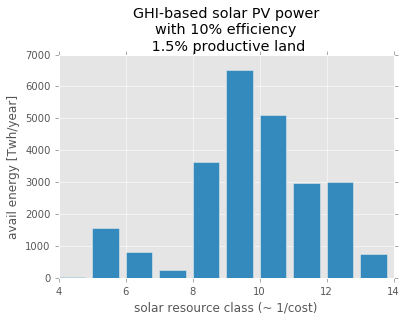

In [518]:
plt.bar(solar_res2['United States of America'].keys(),solar_res2['United States of America'].values())
plt.ylabel('avail energy [Twh/year]')
plt.title('GHI-based solar PV power\nwith 10% efficiency\n 1.5% productive land')
plt.xlabel('solar resource class (~ 1/cost)')

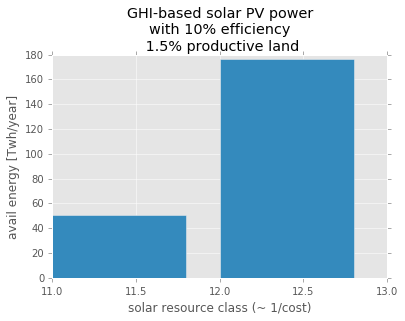

In [519]:
plt.bar(solar_res2['United Arab Emirates'].keys(),solar_res2['United Arab Emirates'].values())
plt.ylabel('avail energy [Twh/year]')
plt.title('GHI-based solar PV power\nwith 10% efficiency\n 1.5% productive land')
plt.xlabel('solar resource class (~ 1/cost)')

convert to capacities

In [520]:
solar_cap={}
for i in solar_res:
    if i not in solar_cap:solar_cap[i]={}
    for j in solar_res[i]:
        solar_cap[i][j]=solar_res[i][j]*solar_cf[j]/8760
solar_cap2={}
for i in solar_res2:
    if i not in solar_cap2:solar_cap2[i]={}
    for j in solar_res2[i]:
        solar_cap2[i][j]=solar_res2[i][j]*solar_cf[j]/8760       

wind

In [521]:
wind=pd.read_excel(pop_path+'maps/nrelwind.xlsx',sheetname='Onshore Power',skiprows=2)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_cap={}
for i in wind.T.iteritems():
    country=i[1][0]
    if country in data:
        for k in range(1,10):
            if country not in wind_cap:wind_cap[country]={}
            clas=k
            cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
            wind_cap[country][clas]=cap/1000.0 #workbook reported values in GW, we use TW

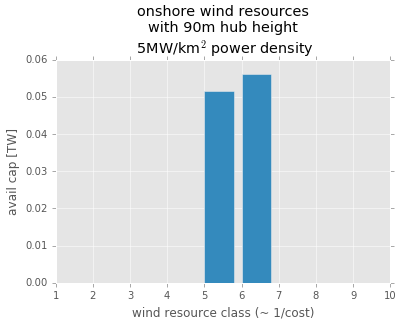

In [522]:
plt.bar(wind_cap['Argentina'].keys(),wind_cap['Denmark'].values())
plt.ylabel('avail cap [TW]')
plt.title('onshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

In [523]:
wind=pd.read_excel(pop_path+'maps/nrelwind.xlsx',sheetname='Onshore Energy',skiprows=2)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_res={}
for i in wind.T.iteritems():
    country=i[1][0]
    if country in data:
        for k in range(1,10):
            if country not in wind_res:wind_res[country]={}
            clas=k
            cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
            wind_res[country][clas]=cap*1000.0 #workbook reported values in PWh, we use TWh

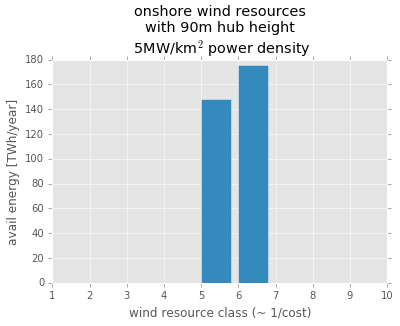

In [524]:
plt.bar(wind_res['Argentina'].keys(),wind_res['Denmark'].values())
plt.ylabel('avail energy [TWh/year]')
plt.title('onshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

In [525]:
wind=pd.read_excel(pop_path+'maps/nrelwind.xlsx',sheetname='Offshore Energy',skiprows=3)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_res2={}
country=''
for i in wind.T.iteritems():
    if str(i[1][0])!='nan':
        country=str(i[1][0])
    water=str(i[1][1])
    if water in {'shallow','transitional'}: #skip deep for now
        if country in data:
            for k in range(2,11):
                if country not in wind_res2:wind_res2[country]={}
                clas=k-1
                cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
                if clas not in wind_res2[country]:wind_res2[country][clas]=0
                wind_res2[country][clas]+=cap*1000.0

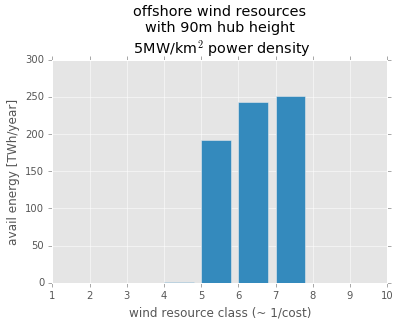

In [526]:
plt.bar(wind_res2['Denmark'].keys(),wind_res2['Denmark'].values())
plt.ylabel('avail energy [TWh/year]')
plt.title('offshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

In [527]:
wind=pd.read_excel(pop_path+'maps/nrelwind.xlsx',sheetname='Offshore Power',skiprows=3)
#http://en.openei.org/doe-opendata/dataset/c186913f-6684-4455-a2f2-f26e152a9b35/resource/4dc4a6fd-3a63-47df-bcbe-e9c83b83b38e/download/nrelcfddawindsc20130603.xlsx
wind_cap2={}
country=''
for i in wind.T.iteritems():
    if str(i[1][0])!='nan':
        country=str(i[1][0])
    water=str(i[1][1])
    if water in {'shallow','transitional'}: #skip deep for now
        if country in data:
            for k in range(2,11):
                if country not in wind_cap2:wind_cap2[country]={}
                clas=k-1
                cap=i[1][k] + i[1][k+10]# + i[1][k+20] #last one too far 0-50,50-100,100-5000
                if clas not in wind_cap2[country]:wind_cap2[country][clas]=0
                wind_cap2[country][clas]+=cap/1000.0

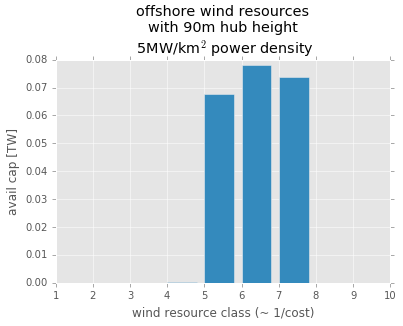

In [528]:
plt.bar(wind_cap2['Denmark'].keys(),wind_cap2['Denmark'].values())
plt.ylabel('avail cap [TW]')
plt.title('offshore wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

## Save resource data

In [529]:
res={}
for i in solar_res:
    if i not in res: res[i]={"wind":{"cap":{},"res":{}},"pv":{"cap":{},"res":{}},"csp":{"cap":{},"res":{}}}
    res[i]["csp"]["res"]=solar_res[i]
    res[i]["csp"]["cap"]=solar_cap[i]
    res[i]["pv"]["res"]=solar_res2[i]
    res[i]["pv"]["cap"]=solar_cap2[i]
for i in wind_res: #onshore
    if i not in res: res[i]={"wind":{"cap":{},"res":{}},"pv":{"cap":{},"res":{}},"csp":{"cap":{},"res":{}}}    
    res[i]["wind"]["res"]=wind_res[i]
    res[i]["wind"]["cap"]=wind_cap[i]
for i in wind_res2: #offshore
    if i not in res: res[i]={"wind":{"cap":{},"res":{}},"pv":{"cap":{},"res":{}},"csp":{"cap":{},"res":{}}}    
    for j in wind_res2[i]:
        if j not in res[i]["wind"]["res"]:res[i]["wind"]["res"][j]=0
        res[i]["wind"]["res"][j]+=wind_res2[i][j]
    for j in wind_cap2[i]:
        if j not in res[i]["wind"]["cap"]:res[i]["wind"]["cap"][j]=0
        res[i]["wind"]["cap"][j]+=wind_cap2[i][j]

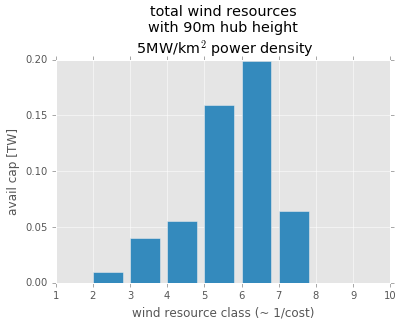

In [530]:
plt.bar(res['Norway']['wind']['cap'].keys(),res['Norway']['wind']['cap'].values())
plt.ylabel('avail cap [TW]')
plt.title('total wind resources\nwith 90m hub height\n 5MW/km$^2$ power density')
plt.xlabel('wind resource class (~ 1/cost)')

In [531]:
#save data
file(pop_path+'maps/res.json','w').write(json.dumps(res))

## Potentials

Estimate remaining potentials

In [20]:
#biomass
#http://www.sciencedirect.com/science/article/pii/S0961953414005340
#Table 5, they all come on one tier
#nuclear
#the chance for developing nuclear is essentially zero, e.g. infinite cost
#hydro
#http://www.intpow.com/index.php?id=487&download=1

create EROEI - resource class functions

In [21]:
#load savedata4
predata=json.loads(file(pop_path+'maps/res.json','r').read())
res={}
for c in predata:
    res[c]={}
    for f in predata[c]:
        res[c][f]={}
        for r in predata[c][f]:
            res[c][f][r]={}
            for year in predata[c][f][r]:
                res[c][f][r][int(year)]=predata[c][f][r][year]
predata={}

In [23]:
res['Afghanistan']['csp']['res']

{1: 0.14894710891899998,
 2: 39.526918731184,
 3: 212.81736247049523,
 4: 343.88919981628334,
 5: 432.757817556891,
 6: 3079.03440882861,
 7: 767.4486675578074}

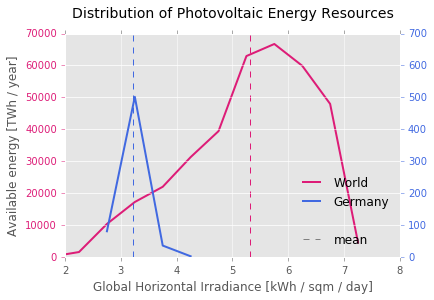

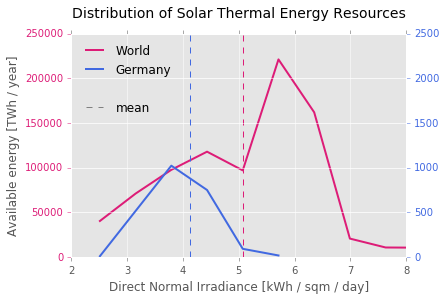

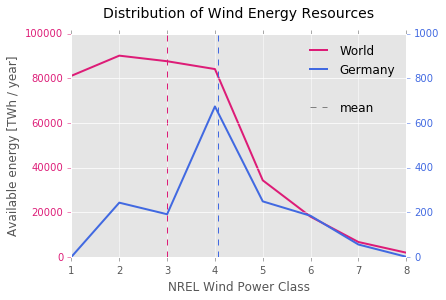

In [24]:
groei={}
groei2={}
sd={"pv":[],"wind":[],"csp":[]}
cvtr={"pv":0.5,"wind":1,"csp":0.64}
cvtr2={"pv":0.25,"wind":0,"csp":1.87}
for c in res:
    for r in res[c]:
        if r not in groei: groei[r]={}
        if r not in groei2: groei2[r]={}
        for cl in res[c][r]['res']:
            if cl not in groei[r]: groei[r][cl]=0
            groei[r][cl]+=res[c][r]['res'][cl]
            
            w=cl*cvtr[r]+cvtr2[r]
            sd[r].append({"country":c,"class":cl,"value":res[c][r]['res'][cl],"w":w})
            if w not in groei2[r]: groei2[r][w]=0
            groei2[r][w]+=res[c][r]['res'][cl]
            
aroei={}
titles=['Photovoltaic','Solar Thermal','Wind']
t2=['\n10% overall efficiency\ncovering 1.5% of productive land in each country',
    '\ncalculated with 6 hours of storage\n31MW/km$^2$ power density',
    '\nonshore + offshore, calculated for 90m hub height\n 5MW/km$^2$ power density']
t2=['','','']
t3=['Global Horizontal Irradiance [kWh / sqm / day]','Direct Normal Irradiance [kWh / sqm / day]','NREL Wind Power Class']
t4=[[2,8],[2,8],[1,8]]
t5=[[0,70000],[0,250000],[0,100000]]
t6=[[0,700],[0,2500],[0,1000]]
locs=[4,2,1]
cs=['Germany','Germany','Germany']
for j,r in enumerate(groei2):
    x=[]
    y=[]
    for i in range(len(sorted(groei2[r].keys()))):
        x.append(float(sorted(groei2[r].keys())[i]))
        y.append(float(groei2[r][sorted(groei2[r].keys())[i]]))
    aroei[r]=np.average(x,weights=y)
    plt.figure()
    plt.plot(x,y,color='#dd1c77',lw=2)
    plt.title('Distribution of '+titles[j]+' Energy Resources'+t2[j],fontsize=14,y=1.05)
    plt.ylabel('Available energy [TWh / year]')
    plt.xlabel(t3[j])
    plt.ylim(t5[j])
    plt.tick_params(axis='y', colors='#dd1c77')
    z=np.average(x,weights=y)
    plt.axvline(z,color='#dd1c77',lw=1,ls='--')
    
    c=cs[j]
    x=[]
    y=[]
    for i in range(len(sorted(res[c][r]['res'].keys()))):
            x.append(float(sorted(res[c][r]['res'].keys())[i])*cvtr[r]+cvtr2[r])
            y.append(float(res[c][r]['res'][sorted(res[c][r]['res'].keys())[i]]))
    ax=plt.twinx()
    plt.plot([-10],[-10],color='#dd1c77',lw=2,label='World')
    ax.plot(x,y,color='royalBlue',lw=2,label=c)
    plt.plot([-10],[-10],color='grey',lw=1,ls='',label=' ')
    plt.plot([-10],[-10],color='grey',lw=1,ls='--',label='mean')
    ax.tick_params(axis='y', colors='royalBlue')
    z=np.average(x,weights=y)
    plt.axvline(z,color='royalBlue',lw=1,ls='--')
    plt.ylim(t6[j])
    plt.xlim(t4[j])
    plt.legend(loc=locs[j],framealpha=0)
    
#wind class http://rredc.nrel.gov/wind/pubs/atlas/appendix_A.html
#NREL Renewable Resource Data Center

In [25]:
groei={}
groei2={}
groei3={}
sd={"pv":[],"wind":[],"csp":[]}
cvtr={"pv":0.5,"wind":1,"csp":0.64}
cvtr2={"pv":0.25,"wind":0,"csp":1.87}
rr={"pv":"solar","wind":"wind","csp":"csp"}
for c in res:
    for r in res[c]:
        if r not in groei: groei[r]={}
        if r not in groei2: groei2[r]={}
        if r not in groei3: groei3[r]={}
        for cl in res[c][r]['res']:
            if cl not in groei[r]: groei[r][cl]=0
            groei[r][cl]+=res[c][r]['res'][cl]
            
            w=cl*cvtr[r]+cvtr2[r]
            sd[r].append({"country":c,"class":cl,"value":res[c][r]['res'][cl],"w":w})
            if w not in groei2[r]: groei2[r][w]=0
            groei2[r][w]+=res[c][r]['res'][cl]
            
            #even distribution across resource classes fpr existing production
            s=res[c][r]['res'][cl]*1.0/sum(res[c][r]['res'].values())
            if c in data:
                if rr[r] in data[c][2014]['energy']:
                    if w not in groei3[r]: groei3[r][w]=0
                    groei3[r][w]=np.nansum([groei3[r][w],s*data[c][2014]['energy'][rr[r]]['cons']['navg3']])
            
aroei={}
titles=['Photovoltaic','Solar Thermal','Wind']
t2=['\n10% overall efficiency\ncovering 1.5% of productive land in each country',
    '\ncalculated with 6 hours of storage\n31MW/km$^2$ power density',
    '\nonshore + offshore, calculated for 90m hub height\n 5MW/km$^2$ power density']
t2=['','','']
t3=['Global Horizontal Irradiance [kWh / sqm / day]','Direct Normal Irradiance [kWh / sqm / day]','NREL Wind Power Class']
t4=[[2,8],[2,8],[1,8]]
t5=[[0,70000],[0,250000],[0,100000]]
t6=[[0,70],[0,10],[0,300]]
locs=[2,2,1]
for j,r in enumerate(groei2):
    x=[]
    y=[]
    for i in range(len(sorted(groei2[r].keys()))):
        x.append(float(sorted(groei2[r].keys())[i]))
        y.append(float(groei2[r][sorted(groei2[r].keys())[i]]))
    aroei[r]=np.average(x,weights=y)
    plt.figure()
    plt.plot(x,y,color='#dd1c77',lw=2)
    plt.title('Global '+titles[j]+' Energy Resource'+t2[j]+' Utilization',fontsize=14,y=1.05)
    plt.ylabel('Available energy [TWh / year]')
    plt.xlabel(t3[j])
    plt.ylim(t5[j])
    plt.tick_params(axis='y', colors='#dd1c77')
    z=np.average(x,weights=y)
    plt.axvline(z,color='#dd1c77',lw=1,ls='--')
    
    x=[]
    y=[]
    for i in range(len(sorted(groei3[r].keys()))):
        x.append(float(sorted(groei3[r].keys())[i]))
        y.append(float(groei3[r][sorted(groei3[r].keys())[i]]))
    ax=plt.twinx()
    plt.plot([-10],[-10],color='#dd1c77',lw=2,label='Total Energy Resource')
    ax.plot(x,y,color='royalBlue',lw=2,label='Generation in 2014')
    plt.plot([-10],[-10],color='grey',lw=1,ls='',label=' ')
    plt.plot([-10],[-10],color='grey',lw=1,ls='--',label='mean')
    ax.tick_params(axis='y', colors='royalBlue')
    z=np.average(x,weights=y)
    plt.axvline(z,color='royalBlue',lw=1,ls='--')
    plt.ylim(t6[j])
    plt.xlim(t4[j])
    plt.legend(loc=locs[j],framealpha=0)
    
#wind class http://rredc.nrel.gov/wind/pubs/atlas/appendix_A.html
#NREL Renewable Resource Data Center

KeyError: 'navg3'

In [26]:
groei={}
groei2={}
groei3={}
sd={"pv":[],"wind":[],"csp":[]}
cvtr={"pv":0.5,"wind":1,"csp":0.64}
cvtr2={"pv":0.25,"wind":0,"csp":1.87}
rr={"pv":"solar","wind":"wind","csp":"csp"}
for c in res:
    for r in res[c]:
        if r not in groei: groei[r]={}
        if r not in groei2: groei2[r]={}
        if r not in groei3: groei3[r]={}
        for cl in res[c][r]['res']:
            if cl not in groei[r]: groei[r][cl]=0
            groei[r][cl]+=res[c][r]['res'][cl]
            
            w=cl#*cvtr[r]+cvtr2[r]
            sd[r].append({"country":c,"class":cl,"value":res[c][r]['res'][cl],"w":w})
            if w not in groei2[r]: groei2[r][w]=0
            groei2[r][w]+=res[c][r]['res'][cl]
            
            #even distribution across resource classes fpr existing production
            s=res[c][r]['res'][cl]*1.0/sum(res[c][r]['res'].values())
            if c in data:
                if rr[r] in data[c][2014]['energy']:
                    if w not in groei3[r]: groei3[r][w]=0
                    groei3[r][w]=np.nansum([groei3[r][w],s*data[c][2014]['energy'][rr[r]]['cons']['navg3']])
            
aroei={}
titles=['Photovoltaic','Solar Thermal','Wind']
t2=['\n10% overall efficiency\ncovering 1.5% of productive land in each country',
    '\ncalculated with 6 hours of storage\n31MW/km$^2$ power density',
    '\nonshore + offshore, calculated for 90m hub height\n 5MW/km$^2$ power density']
t2=['','','']
t3=['Global Horizontal Irradiance [kWh / sqm / day]','Direct Normal Irradiance [kWh / sqm / day]','NREL Wind Power Class']
t4=[[0.5,14.5],[0.5,10.5],[0.5,10.5]]
t5=[[0,70000],[0,250000],[0,100000]]
t6=[[0,70],[0,10],[0,300]]
locs=[2,2,1]
cvv=[0.15,0.15]
for j,r in enumerate(groei2):
    x=[]
    y=[]
    for i in range(len(sorted(groei2[r].keys()))):
        x.append(float(sorted(groei2[r].keys())[i]))
        y.append(float(groei2[r][sorted(groei2[r].keys())[i]]))
    aroei[r]=np.average(x,weights=y)
    fig=plt.figure(figsize=(7,5))
    #fig=plt.figure()
    plt.bar(x,y,color='#dd1c77',lw=2,alpha=0.7, align='center')
    plt.title('Global '+titles[j]+' Energy Resource'+t2[j]+' Utilization',fontsize=14,y=1.05)
    plt.ylabel('Available energy [TWh / year]')
    plt.xlabel('Energy Resource NREL Power Class')
    plt.ylim(t5[j])
    plt.tick_params(axis='y', colors='#dd1c77')
    z=np.average(x,weights=y)
    plt.axvline(z,color='#dd1c77',lw=2,ls='--')
    print z
    
    x=[]
    y=[]
    for i in range(len(sorted(groei3[r].keys()))):
        x.append(float(sorted(groei3[r].keys())[i]))
        y.append(float(groei3[r][sorted(groei3[r].keys())[i]]))
    ax=plt.twinx()
    plt.plot([-10],[-10],color='#dd1c77',lw=2,label='Total Energy Resource')
    plt.plot([-10],[-10],color='royalBlue',lw=2,label='Generation in 2014')
    ax.bar(x,y,color='royalBlue',lw=2,alpha=0.7, align='center')
    plt.plot([-10],[-10],color='grey',lw=2,ls='',label=' ')
    plt.plot([-10],[-10],color='grey',lw=2,ls='--',label='mean')
    ax.tick_params(axis='y', colors='royalBlue')
    z=np.average(x,weights=y)
    plt.axvline(z,color='royalBlue',lw=2,ls='--')
    print z
    plt.ylim(t6[j])
    plt.xlim(t4[j])
    plt.legend(loc=locs[j],framealpha=0)
    if r not in {"wind"}:
        ax2 = fig.add_axes((cvv[j],-0.01,0.725,0.0))
        ax2.yaxis.set_visible(False)
        ax2.set_xlabel(t3[j])
        new_tick_locations = []
        new_ticks = []
        
        for cl in range(1,int(t4[j][1]+0.5),2):
            new_ticks.append(cl*cvtr[r]+cvtr2[r])
            new_tick_locations.append(cl)

        ax2.set_xticks(new_tick_locations)
        ax2.set_xticklabels(new_ticks)

#wind class http://rredc.nrel.gov/wind/pubs/atlas/appendix_A.html
#NREL Renewable Resource Data Center
    plt.savefig(str(r)+'exp.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

KeyError: 'navg3'

10.1401564984
8.31889553961


C:\Anaconda\envs\py27\lib\site-packages\matplotlib\axis.py:1015: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
C:\Anaconda\envs\py27\lib\site-packages\matplotlib\axis.py:1025: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


5.01555862912
5.90817300478
2.99349350317
3.2692022702


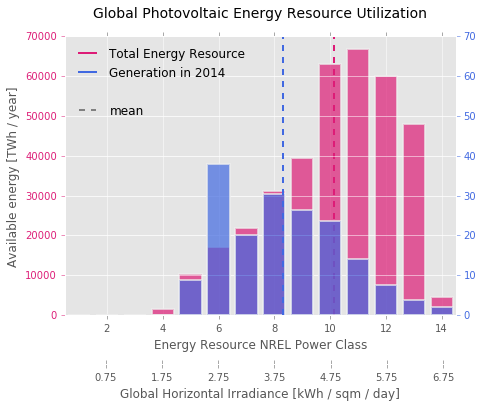

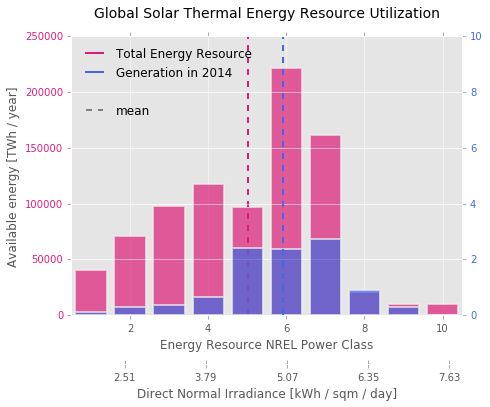

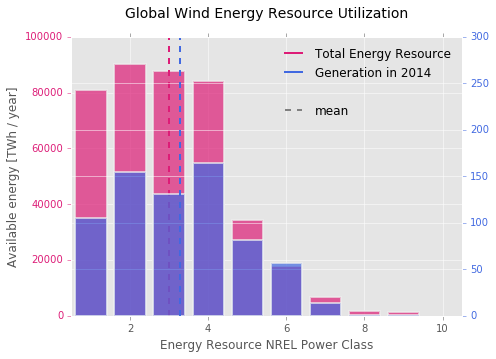

In [57]:
groei={}
groei2={}
groei3={}
sd={"pv":[],"wind":[],"csp":[]}
cvtr={"pv":0.5,"wind":1,"csp":0.64}
cvtr2={"pv":0.25,"wind":0,"csp":1.87}
rr={"pv":"solar","wind":"wind","csp":"csp"}
for c in res:
    for r in res[c]:
        if r not in groei: groei[r]={}
        if r not in groei2: groei2[r]={}
        if r not in groei3: groei3[r]={}
        for cl in res[c][r]['res']:
            if cl not in groei[r]: groei[r][cl]=0
            groei[r][cl]+=res[c][r]['res'][cl]
            
            w=cl#*cvtr[r]+cvtr2[r]
            sd[r].append({"country":c,"class":cl,"value":res[c][r]['res'][cl],"w":w})
            if w not in groei2[r]: groei2[r][w]=0
            groei2[r][w]+=res[c][r]['res'][cl]
            
            #even distribution across resource classes fpr existing production
            s=res[c][r]['res'][cl]*1.0/sum(res[c][r]['res'].values())
            if c in data:
                if rr[r] in data[c][2014]['energy']:
                    if w not in groei3[r]: groei3[r][w]=0
                    groei3[r][w]=np.nansum([groei3[r][w],s*data[c][2014]['energy'][rr[r]]['cons']['navg3']])
            
aroei={}
titles=['Photovoltaic','Solar Thermal','Wind']
t2=['\n10% overall efficiency\ncovering 1.5% of productive land in each country',
    '\ncalculated with 6 hours of storage\n31MW/km$^2$ power density',
    '\nonshore + offshore, calculated for 90m hub height\n 5MW/km$^2$ power density']
t2=['','','']
t3=['Global Horizontal Irradiance [kWh / sqm / day]','Direct Normal Irradiance [kWh / sqm / day]','NREL Wind Power Class']
t4=[[0.5,14.5],[0.5,10.5],[0.5,10.5]]
t5=[[0,70000],[0,250000],[0,100000]]
t6=[[0,70],[0,10],[0,300]]
locs=[2,2,1]
cvv=[0.15,0.15]
for j,r in enumerate(groei2):
    x=[]
    y=[]
    for i in range(len(sorted(groei2[r].keys()))):
        x.append(float(sorted(groei2[r].keys())[i]))
        y.append(float(groei2[r][sorted(groei2[r].keys())[i]]))
    aroei[r]=np.average(x,weights=y)
    fig=plt.figure(figsize=(7,5))
    #fig=plt.figure()
    plt.bar(x,y,color='#dd1c77',lw=2,alpha=0.7, align='center')
    plt.title('Global '+titles[j]+' Energy Resource'+t2[j]+' Utilization',fontsize=14,y=1.05)
    plt.ylabel('Available energy [TWh / year]')
    plt.xlabel('Energy Resource NREL Power Class')
    plt.ylim(t5[j])
    plt.tick_params(axis='y', colors='#dd1c77')
    z=np.average(x,weights=y)
    plt.axvline(z,color='#dd1c77',lw=2,ls='--')
    print z
    
    x=[]
    y=[]
    for i in range(len(sorted(groei3[r].keys()))):
        x.append(float(sorted(groei3[r].keys())[i]))
        y.append(float(groei3[r][sorted(groei3[r].keys())[i]]))
    ax=plt.twinx()
    plt.plot([-10],[-10],color='#dd1c77',lw=2,label='Total Energy Resource')
    plt.plot([-10],[-10],color='royalBlue',lw=2,label='Generation in 2014')
    ax.bar(x,y,color='royalBlue',lw=2,alpha=0.7, align='center')
    plt.plot([-10],[-10],color='grey',lw=2,ls='',label=' ')
    plt.plot([-10],[-10],color='grey',lw=2,ls='--',label='mean')
    ax.tick_params(axis='y', colors='royalBlue')
    z=np.average(x,weights=y)
    plt.axvline(z,color='royalBlue',lw=2,ls='--')
    print z
    plt.ylim(t6[j])
    plt.xlim(t4[j])
    plt.legend(loc=locs[j],framealpha=0)
    if r not in {"wind"}:
        ax2 = fig.add_axes((cvv[j],-0.01,0.725,0.0))
        ax2.yaxis.set_visible(False)
        ax2.set_xlabel(t3[j])
        new_tick_locations = []
        new_ticks = []
        
        for cl in range(1,int(t4[j][1]+0.5),2):
            new_ticks.append(cl*cvtr[r]+cvtr2[r])
            new_tick_locations.append(cl)

        ax2.set_xticks(new_tick_locations)
        ax2.set_xticklabels(new_ticks)

#wind class http://rredc.nrel.gov/wind/pubs/atlas/appendix_A.html
#NREL Renewable Resource Data Center
    plt.savefig(str(r)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

resource normalization

In [10]:
#load res
predata=json.loads(file(pop_path+'maps/res.json','r').read())
res={}
for c in predata:
    res[c]={}
    for f in predata[c]:
        res[c][f]={}
        for r in predata[c][f]:
            res[c][f][r]={}
            for year in predata[c][f][r]:
                res[c][f][r][int(year)]=predata[c][f][r][year]
predata={}

In [58]:
#pv classes = 4-14
#wind classes = 1-9
#csp classes = 1-10

def histo(x,y,b): #one elment histogram rebin interpolator (for wind 9->10 classes)
    if b>len(x):
        if b==10 and len(x)==9:
            yy=np.histogram(x,weights=y,bins=b)[0]
            #return yy #turn off
            toadd=((yy[3]+yy[5])/2.0)*0.7 #multipl. to adjust for recurrency .88 approx.
            shares=np.array(yy)/np.sum(yy) #redistribute based on resource size
            for s in range(10):
                if s not in [4]:
                    shares[s]*=(abs(1.0/(4-s))) #scale based on dist from number
            shares=shares/np.sum(shares)
            for s in range(10):
                if s not in [4]:
                    yy[s]-=toadd*shares[s]
                    yy[4]+=toadd*shares[s]
            return yy
        else: print "error, this is a custom function..."
    else:
        return np.histogram(x,weights=y,bins=b)[0]

lim={"pv":[4,14],"wind":[1,9],"csp":[1,10]}

newres={}
for c in res:
    newres[c]={}
    for r in res[c]:
        newres[c][r]={}
        for f in res[c][r]:
            newres[c][r][f]={}
            helper=dict(res[c][r][f])
            x=[]
            y=[]
            for k in range(0,15):
                if k<lim[r][0] or k>lim[r][1]: #pop items outside class limits - these are small errors
                    if k in helper:helper.pop(k);
                elif k not in helper:helper[k]=0 #else insert it if is not there already
            for i in range(len(sorted(helper.keys()))):
                x.append(float(sorted(helper.keys())[i]))
                y.append(float(helper[sorted(helper.keys())[i]]))
            #plt.figure()
            #plt.bar(x,y,alpha=0.6)
            yy=histo(x,y,10)        
            xx=range(1,11)
            #plt.bar(xx,yy,alpha=0.6,color='red')
            for i in xx:
                newres[c][r][f][i]=yy[i-1]

In [582]:
#save data
file(pop_path+'maps/newres.json','w').write(json.dumps(newres))

In [415]:
#load res
predata=json.loads(file(pop_path+'maps/newres.json','r').read())
res={}
for c in predata:
    res[c]={}
    for f in predata[c]:
        res[c][f]={}
        for r in predata[c][f]:
            res[c][f][r]={}
            for year in predata[c][f][r]:
                res[c][f][r][int(year)]=predata[c][f][r][year]
predata={}

Democratic Republic of the Congo
pv 7.12869837725
pv 5.30708065339


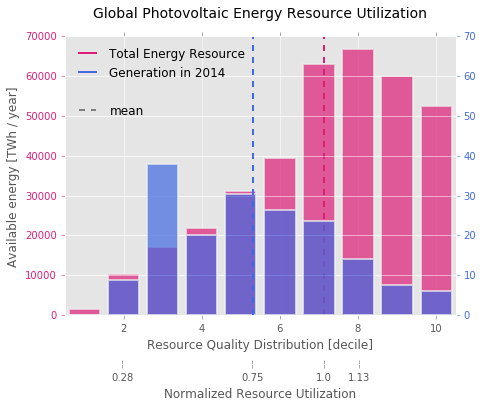

csp 5.01555862912
csp 5.90817300478


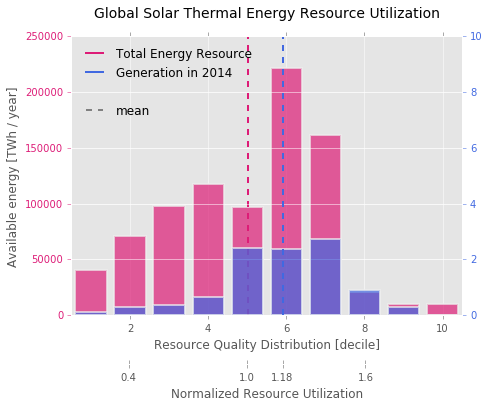

wind 3.24172097171
wind 3.58047844792


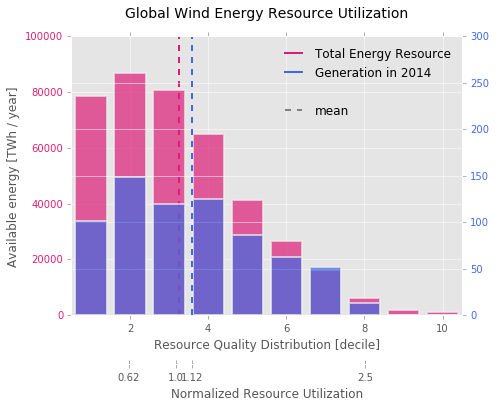

In [68]:
#pv classes = 4-14
#wind classes = 1-9
#csp classes = 1-10

groei={}#resources
groei3={}#built
sd={"pv":[],"wind":[],"csp":[]}
sd2={"pv":[],"wind":[],"csp":[]}
rr={"pv":"solar","wind":"wind","csp":"csp"}
for c in res:
    croei={}
    try:
        for r in res[c]:
            if r not in groei: groei[r]={}
            if r not in groei3: groei3[r]={}
            for cl in res[c][r]['res']:
                if not np.isnan(res[c][r]['res'][cl]):
                    if cl not in groei[r]: groei[r][cl]=0
                    if cl not in croei: croei[cl]=0
                    v=res[c][r]['res'][cl]
                    groei[r][cl]=np.nansum([groei[r][cl],v])
                    croei[cl]=np.nansum([croei[cl],v])

                    #even distribution across resource classes for existing production
                    s=res[c][r]['res'][cl]*1.0/sum(res[c][r]['res'].values())
                    if c in data:
                        for year in data[c]:
                            if year<2015:
                                if rr[r] in data[c][year]['energy']:
                                    if cl not in groei3[r]: groei3[r][cl]=0
                                    v=s*data[c][year]['energy'][rr[r]]['cons']['navg3']    
                                    if year==2014:
                                        groei3[r][cl]=np.nansum([groei3[r][cl],v])
                                    if not np.isnan(v):
                                        if v>0.01:
                                            sd2[r].append({"country":c,"class":cl,"value":v,"year":year})

                    sd[r].append({"country":c,"class":cl,"value":res[c][r]['res'][cl],"year":2014})
        
    except: print c
            
aroei={}
titles=['Photovoltaic','Solar Thermal','Wind']
t2=['\n10% overall efficiency\ncovering 1.5% of productive land in each country',
    '\ncalculated with 6 hours of storage\n31MW/km$^2$ power density',
    '\nonshore + offshore, calculated for 90m hub height\n 5MW/km$^2$ power density']
t2=['','','']
t3=['Global Horizontal Irradiance [kWh / sqm / day]','Direct Normal Irradiance [kWh / sqm / day]','NREL Wind Power Class']
t4=[[0.5,10.5],[0.5,10.5],[0.5,10.5]]
t5=[[0,70000],[0,250000],[0,100000]]
t6=[[0,70],[0,10],[0,300]]
locs=[2,2,1]
cvtr={"pv":0.5,"wind":1,"csp":0.64}
cvtr2={"pv":0.25,"wind":0,"csp":1.87}
for j,r in enumerate(groei):
    x=[]
    y=[]
    for i in range(len(sorted(groei[r].keys()))):
        if float(groei[r][sorted(groei[r].keys())[i]])>0.1:
            x.append(float(sorted(groei[r].keys())[i]))
            y.append(float(groei[r][sorted(groei[r].keys())[i]]))
    aroei[r]=np.average(x,weights=y)
    fig=plt.figure(figsize=(7,5))
    plt.bar(x,y,color='#dd1c77',lw=2,alpha=0.7, align='center')
    plt.title('Global '+titles[j]+' Energy Resource'+t2[j]+' Utilization',fontsize=14,y=1.05)
    plt.ylabel('Available energy [TWh / year]')
    plt.xlabel('Resource Quality Distribution [decile]')
    plt.ylim(t5[j])
    plt.tick_params(axis='y', colors='#dd1c77')
    z=np.average(x,weights=y)
    print r,z
    plt.axvline(z,color='#dd1c77',lw=2,ls='--')
    new_tick_locations = [2,8]+[np.round(z,1)]


    x=[]
    y=[]
    for i in range(len(sorted(groei3[r].keys()))):
        x.append(float(sorted(groei[r].keys())[i]))
        y.append(float(groei3[r][sorted(groei3[r].keys())[i]]))
    ax=plt.twinx()
    plt.plot([-10],[-10],color='#dd1c77',lw=2,label='Total Energy Resource')
    plt.plot([-10],[-10],color='royalBlue',lw=2,label='Generation in 2014')
    ax.bar(x,y,color='royalBlue',lw=2,alpha=0.7, align='center')
    plt.plot([-10],[-10],color='grey',lw=2,ls='',label=' ')
    plt.plot([-10],[-10],color='grey',lw=2,ls='--',label='mean')
    ax.tick_params(axis='y', colors='royalBlue')
    z=np.average(x,weights=y)
    print r,z
    plt.axvline(z,color='royalBlue',lw=2,ls='--')
    plt.ylim(t6[j])
    plt.xlim(t4[j])
    plt.legend(loc=locs[j],framealpha=0)

    ax2 = fig.add_axes((0.16,-0.01,0.705,0.0))
    ax2.yaxis.set_visible(False)
    ax2.set_xlabel('Normalized Resource Utilization')
    ax2.set_xlim(1,10)

    new_tick_locations += [np.round(z,1)]
    new_ticks = np.round(np.array(new_tick_locations)/new_tick_locations[2],2)
    
    ax2.set_xticks(new_tick_locations)
    ax2.set_xticklabels(new_ticks)

#wind class http://rredc.nrel.gov/wind/pubs/atlas/appendix_A.html
#NREL Renewable Resource Data Center
    plt.savefig(str(r)+'2.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
    plt.show()

In [630]:
#save
file(pop_path+'../universal/res.json','w').write(json.dumps({"res":sd,"inst":sd2})) 
import zipfile
try:
    import zlib
    compression = zipfile.ZIP_DEFLATED
except:
    compression = zipfile.ZIP_STORED
zf = zipfile.ZipFile(pop_path+'../universal/res.zip', mode='w')
zf.write(pop_path+'../universal/res.json','res.json',compress_type=compression)
zf.close()

exponential distribution

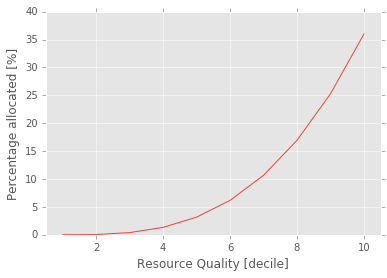

In [27]:
#class-based distribution function
pwr=3
s=sum([i**pwr for i in range(10)])*1.0
classconverter={i+1:i**pwr/s for i in range(10)}
plt.plot(classconverter.keys(),np.array(classconverter.values())*100)#,color='#dd1c77',lw=2,alpha=0.9, align='center')
plt.xlabel('Resource Quality [decile]')
plt.ylabel('Percentage allocated [%]')
plt.xlim(0.5,10.5)
plt.savefig('classconverter'+str(pwr)+'.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
plt.show()

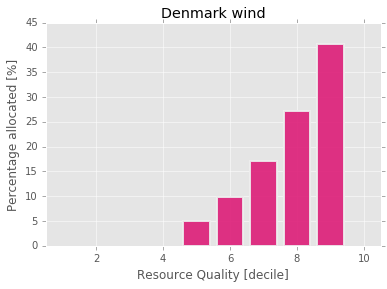

In [35]:
#class-based distribution function
c='Denmark'
r='wind'
pwr=3
classvector=[]
for i in range(1,11):
    if res[c][r]['res'][i]>0:
        classvector.append(i)
s=sum([i**pwr for i in classvector])*1.0
classconverter={i+1:i**pwr/s for i in classvector}
plt.bar(classconverter.keys(),np.array(classconverter.values())*100,color='#dd1c77',lw=2,alpha=0.9, align='center')
plt.xlabel('Resource Quality [decile]')
plt.ylabel('Percentage allocated [%]')
plt.xlim(0.5,10.5)
plt.title(c+' '+r)
plt.show()

In [36]:
def classconvert(a,b,pwr=3):#a classed resource in 10 classes, return exponential distribution, with fill control
    classvector=[]
    for i in range(1,11):
        if a[i]>0:
            if not np.isnan(a[i]):
                classvector.append(i)
    s=sum([i**pwr for i in classvector])*1.0
    z={}
    for i in range(1,11):
        if i in classvector:
            z[i]=i**pwr/s
        else: z[i]=0
    w={}
    tofill=b
    for i in range(10,0,-1):
        if a[i]>0:
            if tofill*z[i]>a[i]: #used to be tofill>a[i]:
                w[i]=a[i]/b
                tofill-=a[i]
                z.pop(i);
            else: break
    q=sum(w.values())
    for i in range(1,11):
        if i not in w:
            w[i]=max(0,z[i]/sum(z.values())*(1.0-q))
    return w

ERROR Democratic Republic of the Congo
weighted average class of resources pv 7.12869837725
weighted average class of generation pv 6.23702663375


C:\Anaconda\envs\py27\lib\site-packages\matplotlib\axis.py:1015: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
C:\Anaconda\envs\py27\lib\site-packages\matplotlib\axis.py:1025: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


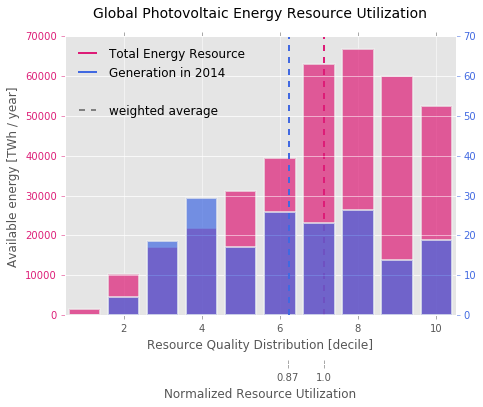

weighted average class of resources csp 5.01555862912
weighted average class of generation csp 8.20048718482


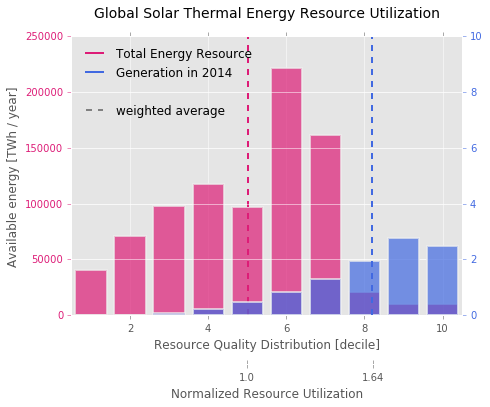

weighted average class of resources wind 3.24172097171
weighted average class of generation wind 6.2702958745


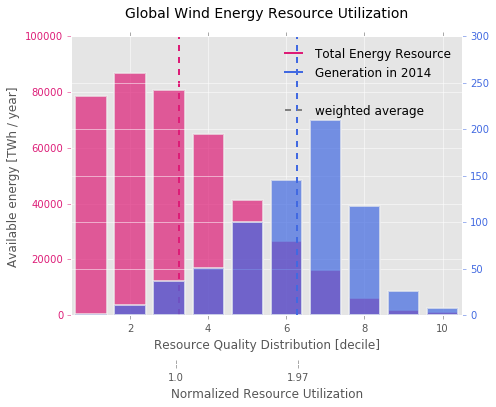

In [39]:
#pv classes = 4-14
#wind classes = 1-9
#csp classes = 1-10

groei={}#resources
groei3={}#built
sd={"pv":[],"wind":[],"csp":[]}
nru={"pv":[],"wind":[],"csp":[]}
sd2={"pv":[],"wind":[],"csp":[]}
rr={"pv":"solar","wind":"wind","csp":"csp"}
for c in res:
    croei={}
    #if True:
    try:
        for r in res[c]:
            if r not in groei: groei[r]={}
            if r not in groei3: groei3[r]={}
            
            #calculate exponential dsitribution in-country
            dynamicres={} #record initial sum of res - necessary for exhaustion mechanism
            for cl in range(10,0,-1): #start from top, step down
                if not np.isnan(res[c][r]['res'][cl]):
                    if cl not in groei[r]: groei[r][cl]=0
                    if cl not in croei: croei[cl]=0
                    v=res[c][r]['res'][cl]
                    groei[r][cl]=np.nansum([groei[r][cl],v])
                    croei[cl]=np.nansum([croei[cl],v])
                                    
                    #exponential distribution across resource classes for existing production
                    #s=res[c][r]['res'][cl]*1.0/sum(res[c][r]['res'].values()) #old, even distribution
                    if c in data:
                        for year in data[c]:
                            if rr[r] in data[c][year]['energy']:
                                if year<2015:
                                    if cl not in groei3[r]: groei3[r][cl]=0
                                    s=classconvert(res[c][r]['res'],data[c][year]['energy'][rr[r]]['cons']['navg3'])[cl]
                                    v=s*data[c][year]['energy'][rr[r]]['cons']['navg3']
                                    if not np.isnan(v):
                                        if v>0.01:
                                            sd2[r].append({"country":c,"class":cl,"value":v,"year":year})
                                            if year==2014:
                                                groei3[r][cl]=np.nansum([groei3[r][cl],v])
                                    

                    sd[r].append({"country":c,"class":cl,"value":res[c][r]['res'][cl],"year":2014})
        
    except: print 'ERROR',c
            
aroei={}
titles=['Photovoltaic','Solar Thermal','Wind']
t2=['\n10% overall efficiency\ncovering 1.5% of productive land in each country',
    '\ncalculated with 6 hours of storage\n31MW/km$^2$ power density',
    '\nonshore + offshore, calculated for 90m hub height\n 5MW/km$^2$ power density']
t2=['','','']
t3=['Global Horizontal Irradiance [kWh / sqm / day]','Direct Normal Irradiance [kWh / sqm / day]','NREL Wind Power Class']
t4=[[0.5,10.5],[0.5,10.5],[0.5,10.5]]
t5=[[0,70000],[0,250000],[0,100000]]
t6=[[0,70],[0,10],[0,300]]
t7=[[0,50000],[0,50000],[0,2000]]
locs=[2,2,1]
cvtr={"pv":0.5,"wind":1,"csp":0.64}
cvtr2={"pv":0.25,"wind":0,"csp":1.87}
for j,r in enumerate(groei):
    x=[]
    y=[]
    for i in range(len(sorted(groei[r].keys()))):
        if float(groei[r][sorted(groei[r].keys())[i]])>0.1:
            x.append(float(sorted(groei[r].keys())[i]))
            y.append(float(groei[r][sorted(groei[r].keys())[i]]))
    aroei[r]=np.average(x,weights=y)
    fig=plt.figure(figsize=(7,5))
    plt.bar(x,y,color='#dd1c77',lw=2,alpha=0.7, align='center')
    plt.title('Global '+titles[j]+' Energy Resource'+t2[j]+' Utilization',fontsize=14,y=1.05)
    plt.ylabel('Available energy [TWh / year]')
    plt.xlabel('Resource Quality Distribution [decile]')
    plt.ylim(t5[j])
    plt.tick_params(axis='y', colors='#dd1c77')
    z=np.average(x,weights=y)
    print 'weighted average class of resources',r,z
    plt.axvline(z,color='#dd1c77',lw=2,ls='--')
    #new_tick_locations = [2,8]+[np.round(z,1)]
    new_tick_locations = [np.round(z,1)]


    x=[]
    y=[]
    for i in range(len(sorted(groei3[r].keys()))):
        x.append(float(sorted(groei[r].keys())[i]))
        y.append(float(groei3[r][sorted(groei3[r].keys())[i]]))
    ax=plt.twinx()
    plt.plot([-10],[-10],color='#dd1c77',lw=2,label='Total Energy Resource')
    plt.plot([-10],[-10],color='royalBlue',lw=2,label='Generation in 2014')
    ax.bar(x,y,color='royalBlue',lw=2,alpha=0.7, align='center')
    plt.plot([-10],[-10],color='grey',lw=2,ls='',label=' ')
    plt.plot([-10],[-10],color='grey',lw=2,ls='--',label='weighted average')
    ax.tick_params(axis='y', colors='royalBlue')
    z=np.average(x,weights=y)
    print 'weighted average class of generation',r,z
    plt.axvline(z,color='royalBlue',lw=2,ls='--')
    plt.ylim(t6[j])
    plt.xlim(t4[j])
    plt.legend(loc=locs[j],framealpha=0)

    ax2 = fig.add_axes((0.16,-0.01,0.705,0.0))
    ax2.yaxis.set_visible(False)
    ax2.set_xlabel('Normalized Resource Utilization')
    ax2.set_xlim(1,10)

    new_tick_locations += [np.round(z,1)]
    new_ticks = np.round(np.array(new_tick_locations)/new_tick_locations[0],2)
    
    nru[r]=new_tick_locations
    
    ax2.set_xticks(new_tick_locations)
    ax2.set_xticklabels(new_ticks)

#wind class http://rredc.nrel.gov/wind/pubs/atlas/appendix_A.html
#NREL Renewable Resource Data Center
    plt.savefig(str(r)+'3.png',bbox_inches = 'tight', pad_inches = 0.1, dpi=150)
    plt.show()

save for viz

In [40]:
#save
file(pop_path+'../universal/res.json','w').write(json.dumps({"res":sd,"inst":sd2})) 
import zipfile
try:
    import zlib
    compression = zipfile.ZIP_DEFLATED
except:
    compression = zipfile.ZIP_STORED
zf = zipfile.ZipFile(pop_path+'../universal/res.zip', mode='w')
zf.write(pop_path+'../universal/res.json','res.json',compress_type=compression)
zf.close()

save for later

In [453]:
file(pop_path+'maps/newres2.json','w').write(json.dumps(newres))

In [32]:
#load res
predata=json.loads(file(pop_path+'maps/newres2.json','r').read())
res={}
for c in predata:
    res[c]={}
    for f in predata[c]:
        res[c][f]={}
        for r in predata[c][f]:
            res[c][f][r]={}
            for year in predata[c][f][r]:
                res[c][f][r][int(year)]=predata[c][f][r][year]
predata={}#save data

shares

In [33]:
nru

{'csp': [], 'pv': [], 'wind': []}

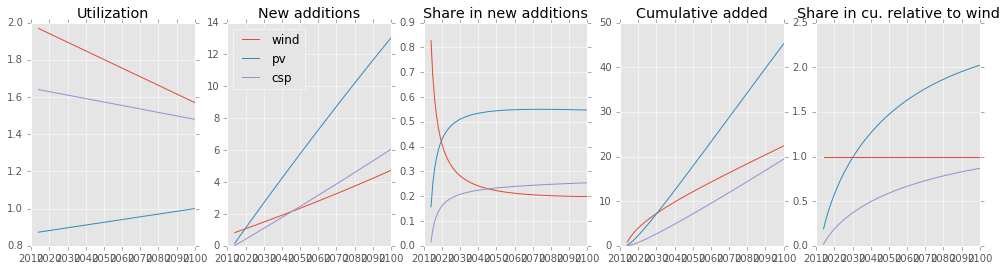

In [72]:
#shares
w=[0.827]
p=[0.157]
c=[0.016]
#Shares
W=[0.827]
P=[0.157]
C=[0.016]
#thetas - normalized resource utilization
wt=[1.09] #wind
wp=[0.68] #pv
wc=[1.18] #csp
wt=[nru['wind'][1]/nru['wind'][0]] #wind
wp=[nru['pv'][1]/nru['pv'][0]] #pv
wc=[nru['csp'][1]/nru['csp'][0]] #csp
#js
jt=[1] #wind
jp=[1.77] #pv
jc=[1.59] #csp
javg=(nru['wind'][0]+nru['csp'][0]+nru['pv'][0])/3.0
jt=[nru['wind'][0]/javg] #wind
jp=[nru['pv'][0]/javg] #pv
jc=[nru['csp'][0]/javg] #csp

tgt=1.57 #target share wind
tgp=1 #target share pv
tgc=1.48 #target share csp
s=0.35
z=0.5
f=2
x=[2014]
for i in range(2015,2101):
    k=i-2014
    x.append(i)
    wt.append(wt[0]+(tgt-wt[0])*(i-2014)/(2101-2015))
    wp.append(wp[0]+(tgp-wp[0])*(i-2014)/(2101-2015))
    wc.append(wc[0]+(tgc-wc[0])*(i-2014)/(2101-2015))
    w.append(w[k-1]+((1.0/3)*(1/wt[k-1])**z*jt[0]**s)**f)
    p.append(p[k-1]+((1.0/3)*(1/wp[k-1])**z*jp[0]**s)**f)
    c.append(c[k-1]+((1.0/3)*(1/wc[k-1])**z*jc[0]**s)**f)
    jt.append(jt[0])
    jp.append(jp[0])
    jc.append(jc[0])
    W.append(W[k-1]+w[k]/(w[k]+p[k]+c[k]))
    P.append(P[k-1]+p[k]/(w[k]+p[k]+c[k]))
    C.append(C[k-1]+c[k]/(w[k]+p[k]+c[k]))
    
fig,ax=plt.subplots(1,5,figsize=(17,4))
ax[0].plot(x,wt)
ax[0].plot(x,wp)
ax[0].plot(x,wc)
ax[0].set_title('Utilization')
ax[1].plot(x,w,label='wind')
ax[1].plot(x,p,label='pv')
ax[1].plot(x,c,label='csp')
ax[1].legend(loc=2)
ax[1].set_title('New additions')
ax[3].plot(x,W)
ax[3].plot(x,P)
ax[3].plot(x,C)
ax[3].set_title('Cumulative added')
ax[2].plot(x,[w[k]/(w[k]+p[k]+c[k]) for k in range(len(w))])
ax[2].plot(x,[p[k]/(w[k]+p[k]+c[k]) for k in range(len(w))])
ax[2].plot(x,[c[k]/(w[k]+p[k]+c[k]) for k in range(len(w))])
ax[2].set_title('Share in new additions')
ax[4].plot(x,[W[k]/W[k] for k in range(len(w))])
ax[4].plot(x,[P[k]/W[k] for k in range(len(w))])
ax[4].plot(x,[C[k]/W[k] for k in range(len(w))])
ax[4].set_title('Share in cu. relative to wind')
plt.show()

In [68]:
for year in [86]:
    print x[year],'omega wind',W[year]*1.0/(W[year]+P[year]+C[year]),
    print 'omega pv',P[year]*1.0/(W[year]+P[year]+C[year]),
    print 'omega csp',C[year]*1.0/(W[year]+P[year]+C[year])

2100 omega wind 0.257054639053 omega pv 0.519887654827 omega csp 0.22305770612


In [69]:
for year in [6,26,46,66,86]:
    print x[year],'omega/wind wind',W[year]*1.0/(W[year]),
    print 'omega/wind pv',P[year]*1.0/(W[year]),
    print 'omega/wind csp',C[year]*1.0/(W[year])

2020 omega/wind wind 1.0 omega/wind pv 0.579075359648 omega/wind csp 0.188456527352
2040 omega/wind wind 1.0 omega/wind pv 1.26459829228 omega/wind csp 0.494114852701
2060 omega/wind wind 1.0 omega/wind pv 1.63175468273 omega/wind csp 0.666491573744
2080 omega/wind wind 1.0 omega/wind pv 1.8649120938 omega/wind csp 0.782938078709
2100 omega/wind wind 1.0 omega/wind pv 2.02247917696 omega/wind csp 0.867744332264


In [76]:
eroei={"pv":12,"wind":22,"csp":12}
xk={"pv":tgp,"wind":tgt,"csp":tgc}
rtau={}
for r in eroei:
    rtau[r]=eroei[r]*1.0/(nru[r][1]/nru[r][0])
    print r,': theta',nru[r][1]/nru[r][0],'xk',xk[r],'rtau',rtau[r],'avg class',nru[r][0]

pv : theta 0.87323943662 xk 1 rtau 13.7419354839 avg class 7.1
csp : theta 1.64 xk 1.48 rtau 7.31707317073 avg class 5.0
wind : theta 1.96875 xk 1.57 rtau 11.1746031746 avg class 3.2


redo above for all data years when finished!

postprocess data for geo map

In [82]:
isoc2=json.loads(file(pop_path+'../universal/isocountries2.json','r').read())

In [92]:
crs=set()
for k in sd:
    for c in sd[k]:
        crs.add( c["country"])

In [116]:
clrs={}
isoico={}
for i in isoc:
    if isoc[i] in crs:
        try:
            clrs[isoc[i]]=isocolors[isoc2[str(int(float(i)))].lower()]
        except: clrs[isoc[i]]="#ededed"
        try:
            isoico[isoc[i]]=isoc2[str(int(float(i)))]
        except: isoico[isoc[i]]="zz"

In [117]:
#save
file('E:/Skydrive/GitHub/netset/clrs.json','w').write(json.dumps(clrs)) 
file('E:/Skydrive/GitHub/netset/isoico.json','w').write(json.dumps(isoico)) 

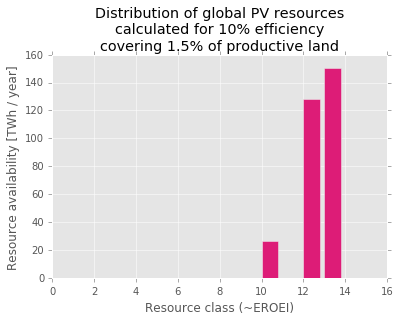

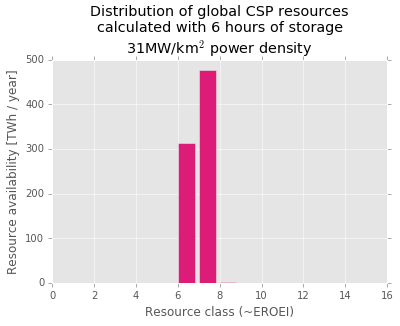

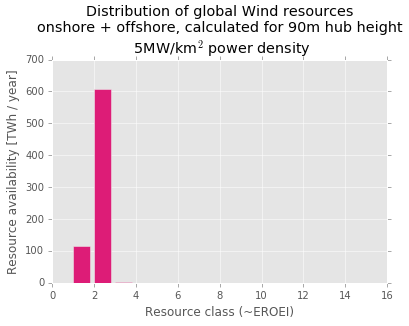

In [133]:
groei={}
for c in ['Jordan']:
    for r in res[c]:
        if r not in groei: groei[r]={}
        for cl in res[c][r]['res']:
            if cl not in groei[r]: groei[r][cl]=0
            groei[r][cl]+=res[c][r]['res'][cl]
aroei={}
titles=['PV','CSP','Wind']
t2=['\ncalculated for 10% efficiency\ncovering 1.5% of productive land',
    '\ncalculated with 6 hours of storage\n31MW/km$^2$ power density',
    '\nonshore + offshore, calculated for 90m hub height\n 5MW/km$^2$ power density']
for j,r in enumerate(groei):
    x=[]
    y=[]
    for i in range(len(sorted(groei[r].keys()))):
        x.append(float(sorted(groei[r].keys())[i]))
        y.append(float(groei[r][sorted(groei[r].keys())[i]]))
    aroei[r]=np.average(x,weights=y)
    plt.figure()
    plt.bar(x,y,color='#dd1c77')
    plt.title('Distribution of global '+titles[j]+' resources'+t2[j])
    plt.ylabel('Resource availability [TWh / year]')
    plt.xlabel(u'Resource class (~EROEI)')
    plt.xlim(0,16)
    

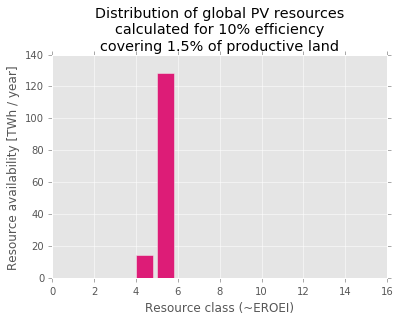

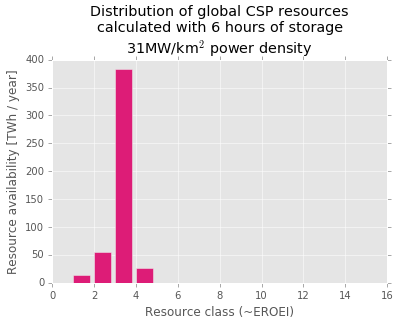

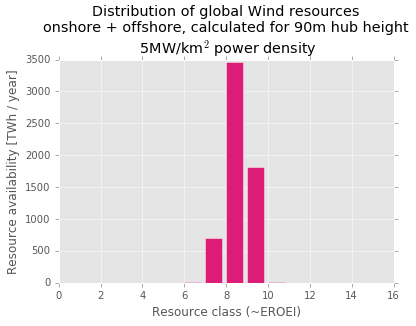

In [134]:
groei={}
for c in ['Iceland']:
    for r in res[c]:
        if r not in groei: groei[r]={}
        for cl in res[c][r]['res']:
            if cl not in groei[r]: groei[r][cl]=0
            groei[r][cl]+=res[c][r]['res'][cl]
aroei={}
titles=['PV','CSP','Wind']
t2=['\ncalculated for 10% efficiency\ncovering 1.5% of productive land',
    '\ncalculated with 6 hours of storage\n31MW/km$^2$ power density',
    '\nonshore + offshore, calculated for 90m hub height\n 5MW/km$^2$ power density']
for j,r in enumerate(groei):
    x=[]
    y=[]
    for i in range(len(sorted(groei[r].keys()))):
        x.append(float(sorted(groei[r].keys())[i]))
        y.append(float(groei[r][sorted(groei[r].keys())[i]]))
    aroei[r]=np.average(x,weights=y)
    plt.figure()
    plt.bar(x,y,color='#dd1c77')
    plt.title('Distribution of global '+titles[j]+' resources'+t2[j])
    plt.ylabel('Resource availability [TWh / year]')
    plt.xlabel(u'Resource class (~EROEI)')
    plt.xlim(0,16)
    

In [631]:
aroei #average eroei normalizer. calculate the global average resource class. 
#since scales are linear, simple proportional scale-up is accurate

{u'csp': 5.015558629120882,
 u'pv': 7.1286983772456995,
 u'wind': 3.2417209717125264}

storage costs

In [10]:
#https://www.researchgate.net/publication/299824220_First_Insights_on_the_Role_of_solar_PV_in_a_100_Renewable_Energy_Environment_based_on_hourly_Modeling_for_all_Regions_globally
cost=pd.read_excel(pop_path+'/maps/storage.xlsx')

In [79]:
predata=json.loads(file(pop_path+'/trade/smalltrade.json','r').read())
tradealpha={}
for c in predata:
    tradealpha[c]={}
    for year in predata[c]:
        tradealpha[c][int(year)]=predata[c][year]
predata={}
print 'tradedata',

tradedata


In [80]:
#existing electricity trade grid (and other fuels)
grid={}
allgrid={}
gridz={}
allgridsize={}
zgrid={}
zzsize={}
for fuel in {"oil","coal","gas","electricity"}:
    if fuel not in grid:grid[fuel]={}
    if fuel not in zgrid:zgrid[fuel]={}
    if fuel not in zzsize:zzsize[fuel]={}
    gridpartners={}
    gridsize={}
    for c in tradealpha:
        if c not in gridpartners:gridpartners[c]=[]
        if c not in allgrid:allgrid[c]=[]
        if c not in gridsize:gridsize[c]=0
        if c not in allgridsize:allgridsize[c]=0
        for y in tradealpha[c]:
            if y not in zgrid[fuel]:zgrid[fuel][y]={}
            if y not in zzsize[fuel]:zzsize[fuel][y]={}
            if fuel in tradealpha[c][y]:  
                for f in tradealpha[c][y][fuel]:
                    for i in tradealpha[c][y][fuel][f]:
                        if i not in {"World","Northern America","Africa",'Latin America and the Caribbean','Europe'}:
                            if int(float(i)) in iso2c:
                                if not np.isnan(tradealpha[c][y][fuel][f][i]):
                                    if tradealpha[c][y][fuel][f][i]!=0:
                                        p=cnc(iso2c[int(float(i))])
                                        
                                        gridsize[c]+=tradealpha[c][y][fuel][f][i]
                                        if p not in gridpartners[c]:
                                            gridpartners[c].append(p)
                                        
                                        allgridsize[c]+=tradealpha[c][y][fuel][f][i]
                                        if p not in allgrid[c]:
                                            allgrid[c].append(p)
                                            
                                        if c not in zzsize[fuel][y]:zzsize[fuel][y][c]=0
                                        zzsize[fuel][y][c]+=tradealpha[c][y][fuel][f][i]
                                        if c not in zgrid[fuel][y]:zgrid[fuel][y][c]={}
                                        if p not in zgrid[fuel][y][c]:
                                            zgrid[fuel][y][c][p]=tradealpha[c][y][fuel][f][i]
                                            
    grid[fuel]=gridpartners
    gridz[fuel]=gridsize

In [81]:
## existing electricity trade grid (and other fuels) last 5 years
grid5={}
gridz5={}
allgrid5={}
allgridsize5={}
for fuel in {"oil","coal","gas","electricity"}:
    if fuel not in grid:grid[fuel]={}
    gridpartners={}
    gridsize={}
    
    for c in tradealpha:
        if c not in gridpartners:gridpartners[c]=[]
        if c not in allgrid5:allgrid5[c]=[]
        if c not in gridsize:gridsize[c]=0
        if c not in allgridsize5:allgridsize5[c]=0
        for y in tradealpha[c]:
            if y>2010:
                if fuel in tradealpha[c][y]:  
                    for f in tradealpha[c][y][fuel]:
                        for i in tradealpha[c][y][fuel][f]:
                            if i not in {"World","Northern America","Africa",'Latin America and the Caribbean','Europe'}:
                                if int(float(i)) in iso2c:
                                    if not np.isnan(tradealpha[c][y][fuel][f][i]):
                                        if tradealpha[c][y][fuel][f][i]!=0:
                                            p=cnc(iso2c[int(float(i))])
                                        
                                            if p not in gridpartners[c]:
                                                gridpartners[c].append(p)

                                            allgridsize[c]+=tradealpha[c][y][fuel][f][i]
                                            if p not in allgrid[c]:
                                                allgrid[c].append(p)
                                                
                                                
    grid5[fuel]=gridpartners
    gridz5[fuel]=gridsize

In [82]:
#save grids
file(pop_path+'grid.json','w').write(json.dumps(grid)) 
file(pop_path+'grid5.json','w').write(json.dumps(grid5)) 
file(pop_path+'gridz.json','w').write(json.dumps(gridz)) 
file(pop_path+'gridz5.json','w').write(json.dumps(gridz5)) 

In [ ]:
#load grids
grid=json.loads(file(pop_path+'grid.json','r').read())
grid5=json.loads(file(pop_path+'grid5.json','r').read())
gridz=json.loads(file(pop_path+'gridz.json','r').read())
gridz5=json.loads(file(pop_path+'gridz5.json','r').read())

world country centroids for network visualizations

In [1]:
import requests, StringIO, zipfile, pandas as pd

In [2]:
r = requests.get('http://gothos.info/resource_files/country_centroids.zip')            #define URL path of zip file to read
z = zipfile.ZipFile(StringIO.StringIO(r.content)) 
coord=pd.read_csv(z.open('country_centroids_all.csv'),sep='\t').drop(['DMS_LAT','DMS_LONG','MGRS','JOG','DSG','FULL_NAME','ISO3136','AFFIL','FIPS10','MOD_DATE'],axis=1)
coord.columns=['LAT','LONG','Country']
coord=coord.set_index('Country',drop=True)
coord.head(2)

LAT  LONG
Country                
Afghanistan  33.0  66.0
Albania      41.0  20.0

In [6]:
#create normalized distance matrix of countries
names=[]
for i in coord.index:
    names.append(cnc(i))
coord['NAME']=names
coord=coord.set_index('NAME',drop=True)

In [7]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r
def distance(i,j):
    if i in coord.index and j in coord.index:
        return haversine(coord.loc[i]['LONG'],coord.loc[i]['LAT'],
                    coord.loc[j]['LONG'],coord.loc[j]['LAT'])
    else: return 5000

In [17]:
#long, run once
dists=[]
for i in range(len(goodcountries)):
    for j in range(i):
        dists.append(distance(goodcountries[i],goodcountries[j])) 

In [22]:
distancenorm=np.mean(dists)
def normdistance(i,j):
    if i in coord.index and j in coord.index:
        return haversine(coord.loc[i]['LONG'],coord.loc[i]['LAT'],
                    coord.loc[j]['LONG'],coord.loc[j]['LAT'])/distancenorm
    else: return 5000.0/distancenorm

In [24]:
normdistance('Hungary','Australia')

1.769865876481451

In [25]:
#long, run once
ndists=[]
for i in range(len(goodcountries)):
    ndists.append([])
    for j in range(len(goodcountries)):
        ndists[i].append(normdistance(goodcountries[i],goodcountries[j])) 

In [32]:
print rgc['Hungary'],rgc['Australia']

52 107


In [33]:
ndists[52][107]

1.769865876481451

In [34]:
file('E:/Dropbox/Public/datarepo/Set/db/ndists.json','w').write(json.dumps(ndists)) 

Save trade grids of fuels

In [103]:
#save grid configuration for visualization
for fuel in {"oil","coal","gas","electricity"}:
    gridpartners=grid[fuel]
    network={"nodes":[],"edges":[],"positions":[]}
    goodnodes=[]
    for i in coord.index:
        if cnc(i) in gridpartners:    
            goodnodes.append(cnc(i))
    for i in coord.index:
        if cnc(i) in gridpartners:
            if cnc(i) in gridz[fuel]:size=gridz[fuel][cnc(i)]
            else:size=1
            network["nodes"].append({"name":cnc(i),"size":size})
            network["positions"].append({"name":cnc(i),"x":coord.loc[i]["LONG"],"y":-coord.loc[i]["LAT"]})
            for j in gridpartners[cnc(i)]:
                if j in goodnodes and j!=i:
                    network["edges"].append({"source":cnc(i),"target":j})
    #save
    file(pop_path+'../grid/all_'+fuel+'_grid.json','w').write(json.dumps(network)) 

    gridpartners=grid5[fuel]
    network={"nodes":[],"edges":[],"positions":[]}
    goodnodes=[]
    for i in coord.index:
        if cnc(i) in gridpartners:    
            goodnodes.append(cnc(i))
    for i in coord.index:
        if cnc(i) in gridpartners:
            if cnc(i) in gridz5[fuel]:size=gridz5[fuel][cnc(i)]
            else:size=1
            network["nodes"].append({"name":cnc(i),"size":size})
            network["positions"].append({"name":cnc(i),"x":coord.loc[i]["LONG"],"y":-coord.loc[i]["LAT"]})
            for j in gridpartners[cnc(i)]:
                if j in goodnodes and j!=cnc(i):
                    network["edges"].append({"source":cnc(i),"target":j})
    #save
    file(pop_path+'../grid/last 5_'+fuel+'_grid.json','w').write(json.dumps(network)) 
    
    for y in zgrid[fuel]:    
        gridpartners=zgrid[fuel][y]
        network={"nodes":[],"edges":[],"positions":[]}
        goodnodes=[]
        for i in coord.index:
            if cnc(i) in gridpartners:    
                goodnodes.append(cnc(i))
        for i in coord.index:
            if cnc(i) in gridpartners:
                if cnc(i) in zzsize[fuel][y]:size=zzsize[fuel][y][cnc(i)]
                else:size=1
                network["nodes"].append({"name":cnc(i),"size":size})
                network["positions"].append({"name":cnc(i),"x":coord.loc[i]["LONG"],"y":-coord.loc[i]["LAT"]})
                for j in gridpartners[cnc(i)]:
                    if j in goodnodes and j!=cnc(i):
                        network["edges"].append({"source":cnc(i),"target":j,"value":gridpartners[cnc(i)][j]})
        #save
        file(pop_path+'../grid/'+str(y)+'_'+fuel+'_grid.json','w').write(json.dumps(network))

In [101]:
zgrid['electricity'][2014]['Spain']

{u'Andorra': 0.42954418963094415,
 u'Austria': 0.23365796600702798,
 u'Denmark': 0.12396131733729893,
 u'France': 0.09023139736433457,
 u'Germany': 2.5674873220218,
 u'Italy': 0.019948469359401446,
 u'Luxembourg': 2.498002777015199,
 u'Morocco': 6.997527423981139,
 u'Portugal': 4.663481836525407,
 u'Switzerland': 0.1551916060440833,
 u'United Kingdom': 0.502019608826142,
 u'United States of America': 0.2751019445319423}

In [84]:
for y in zgrid[fuel]:    
        gridpartners=zgrid[fuel][y]
        network={"nodes":[],"edges":[],"positions":[]}
        goodnodes=[]
        for i in coord.index:
            if cnc(i) in gridpartners:    
                goodnodes.append(cnc(i))
        for i in coord.index:
            if cnc(i) in gridpartners:
                if cnc(i) in zzsize[fuel][y]:size=zzsize[fuel][y][cnc(i)]
                else:size=1
                network["nodes"].append({"name":cnc(i),"size":size})
                network["positions"].append({"name":cnc(i),"x":coord.loc[i]["LONG"],"y":-coord.loc[i]["LAT"]})
                for j in gridpartners[cnc(i)]:
                    if j in goodnodes and j!=cnc(i):
                        network["edges"].append({"source":cnc(i),"target":j,"value":gridpartners[cnc(i)][j]})

In [43]:
try:
    import zlib
    compression = zipfile.ZIP_DEFLATED
except:
    compression = zipfile.ZIP_STORED

In [85]:
#save grid configuration for visualization, years by year
network={}
for fuel in {"oil","coal","gas","electricity"}:
    network[fuel]={"nodes":[],"edges":[],"positions":[]}
    goodnodes=[]
    for y in zgrid[fuel]:    
        gridpartners=zgrid[fuel][y]
        for i in coord.index:
            if cnc(i) in gridpartners:    
                goodnodes.append(cnc(i))
        for i in coord.index:
            if cnc(i) in gridpartners:
                if cnc(i) in zzsize[fuel][y]:size=zzsize[fuel][y][cnc(i)]
                else:size=1
                if y==2015:
                    network[fuel]["nodes"].append({"name":cnc(i),"size":size})
                    network[fuel]["positions"].append({"name":cnc(i),"x":coord.loc[i]["LONG"],"y":-coord.loc[i]["LAT"]})
                for j in gridpartners[cnc(i)]:
                    if j in goodnodes and j!=cnc(i):
                        network[fuel]["edges"].append({"source":cnc(i),"target":j,"year":y,"value":gridpartners[cnc(i)][j]})
file(pop_path+'../grid/network.json','w').write(json.dumps(network))
zf = zipfile.ZipFile(pop_path+'../grid/network.zip', mode='w')
zf.write(pop_path+'../grid/network.json','network.json',compress_type=compression)
zf.close()

NameError: name 'compression' is not defined

All grid 

In [ ]:
gridpartners=copy.deepcopy(allgrid)
network={"nodes":[],"edges":[],"positions":[]}
goodnodes=[]
for i in coord.index:
    if cnc(i) in gridpartners:    
        goodnodes.append(cnc(i))
for i in coord.index:
    if cnc(i) in gridpartners:
        if cnc(i) in allgridsize:size=allgridsize[cnc(i)]
        else:size=1
        network["nodes"].append({"name":cnc(i),"size":size})
        network["positions"].append({"name":cnc(i),"x":coord.loc[i]["LONG"],"y":-coord.loc[i]["LAT"]})
        for j in gridpartners[cnc(i)]:
            if j in goodnodes and j!=cnc(i):
                network["edges"].append({"source":cnc(i),"target":j})
#save
file('grid/all_grid.json','w').write(json.dumps(network)) 

gridpartners=copy.deepcopy(allgrid5)
network={"nodes":[],"edges":[],"positions":[]}
goodnodes=[]
for i in coord.index:
    if cnc(i) in gridpartners:    
        goodnodes.append(cnc(i))
for i in coord.index:
    if cnc(i) in gridpartners:
        if cnc(i) in allgridsize5:size=allgridsize5[cnc(i)]
        else:size=1
        network["nodes"].append({"name":cnc(i),"size":size})
        network["positions"].append({"name":cnc(i),"x":coord.loc[i]["LONG"],"y":-coord.loc[i]["LAT"]})
        for j in gridpartners[cnc(i)]:
            if j in goodnodes and j!=cnc(i):
                network["edges"].append({"source":cnc(i),"target":j})
#save
file('grid/all5_grid.json','w').write(json.dumps(network)) 

## Cost

In [46]:
from munkres import Munkres, print_matrix

## ALLOCATION

Create  Hungarian cost matrix. this will be a normalized, per unit EROEI * willingness to do trade. this is the cumulative, directed trade history. 

In [15]:
predata=json.loads(file(pop_path+'/trade/traded.json','r').read())
tradealpha={}
for c in predata:
    tradealpha[c]={}
    for year in predata[c]:
        tradealpha[c][int(year)]=predata[c][year]
predata={}

In [16]:
goodcountries=list(set(data.keys()).intersection(set(tradealpha.keys())))
limit=20 #dev
#goodcountries=goodcountries[:limit]
rgc={} #reverse goodcountries coder
for i in range(len(goodcountries)):
    rgc[goodcountries[i]]=i
matrix=[[0 for i in goodcountries] for j in goodcountries]

Calculate trade influence matrix. Trade influence is proportional to the total histrocial value of energy trade. If there is no energy trade, some trade is still better than no trade. We will two pairs of import-export flows for each pair, once in each entry's data. For deciding the impor cost influence, we will use 2/3 historical imports and 1/3 historcial exports, caluclated separately for sender and receiver flows, then averged. E.g. a good import partner of country A, let's call it country B, exports a large percentage of its exports to country A and country A receives a large share of its exports from B. The reverse flows are also factored in with a weight of 1/3. The partner-parnter weights are factored in with weights 2/3 (meaning that it is a directed flow but any country who depends on imports or exports signifcantly on another, will push hard politically to keep this trade flowing). We have no weighting to differentiate between energy products, all treated the same. We consider the direct flows more reliable information, hence we give them a weight of 2/3, while the reverse flows get 1/3.

In [ ]:
#G1
#normalize solar
for i in goodcountries[:]:
    for fuel in {'solar','wind'}:
        for year in range(1965,2015):
            data[i][year]['energy'][fuel]['cons']['navg3']=np.nanmax([data[i][year]['energy'][fuel]['cons']['navg3'],
                                                                 data[i][year]['energy'][fuel]['prod']['navg3']])
            if np.isnan(data[i][year]['energy'][fuel]['cons']['navg3']):
                data[i][year]['energy'][fuel]['cons']['navg3']=0
            data[i][year]['energy'][fuel]['prod']['navg3']=data[i][year]['energy'][fuel]['cons']['navg3']
        for year in range(2015,2101):
            data[i][year]['energy'][fuel]['cons']['navg3']=data[i][2014]['energy'][fuel]['cons']['navg3']
            data[i][year]['energy'][fuel]['prod']['navg3']=data[i][2014]['energy'][fuel]['prod']['navg3']

In [ ]:
#save data
file(pop_path+'savedata6.json','w').write(json.dumps(data))

## Impex updating

In [22]:
#direct flow matrices
importmatrix=[[0 for i in goodcountries] for j in goodcountries]
exportmatrix=[[0 for i in goodcountries] for j in goodcountries]
#reverse flow matrices
rimportmatrix=[[0 for i in goodcountries] for j in goodcountries]
rexportmatrix=[[0 for i in goodcountries] for j in goodcountries]

cid={}
for i in range(len(goodcountries)):
    cid[goodcountries[i]]=i

#fill import-export matrix for year x with flow f of value v
def impex(reporter,partner,flow,value):
    global importmatrix
    global exportmatrix
    global rimportmatrix
    global rexportmatrix
    i=cid[reporter]
    j=cid[partner]
    if flow in {"Export","Re-Export"}:
        exportmatrix[i][j]+=value
        rimportmatrix[j][i]+=value
    if flow in {"Import","Re-Import"}:
        importmatrix[i][j]+=value
        rexportmatrix[j][i]+=value
    return

#fill up existing values
def reloadimpex(): #runright after after resetting tradealpha
    for i in range(len(goodcountries)):
        reporter=goodcountries[i]
        for year in tradealpha[reporter]:
            for fuel in tradealpha[reporter][year]:
                for flow in tradealpha[reporter][year][fuel]:
                    for p in tradealpha[reporter][year][fuel][flow]:
                        pp=int(float(str(p)))
                        if pp in iso2c:
                            if cnc(iso2c[pp]) in goodcountries: 
                                #self trade allowed
                                partner=cnc(iso2c[pp])
                                value=tradealpha[reporter][year][fuel][flow][p]
                                impex(reporter,partner,flow,value)

In [23]:
#create influence matrix (from normilzed trade matrices)

#norm direct flow matrices
nimportmatrix=[[0 for i in goodcountries] for j in goodcountries]
nexportmatrix=[[0 for i in goodcountries] for j in goodcountries]
#norm reverse flow matrices
nrimportmatrix=[[0 for i in goodcountries] for j in goodcountries]
nrexportmatrix=[[0 for i in goodcountries] for j in goodcountries]

def normalizeimpex():
    global nimportmatrix
    global nexportmatrix
    global nrimportmatrix
    global nrexportmatrix
    #initialize normalized matrices
    for i in range(len(goodcountries)):
        for j in range(len(goodcountries)):
            if np.nanmean(importmatrix[i])>0:nimportmatrix[i][j]=importmatrix[i][j]/np.nanmean(importmatrix[i])
            if np.nanmean(exportmatrix[i])>0:nexportmatrix[i][j]=exportmatrix[i][j]/np.nanmean(exportmatrix[i])
            if np.nanmean(rimportmatrix[i])>0:nrimportmatrix[i][j]=rimportmatrix[i][j]/np.nanmean(rimportmatrix[i])
            if np.nanmean(rexportmatrix[i])>0:nrexportmatrix[i][j]=rexportmatrix[i][j]/np.nanmean(rexportmatrix[i])

In [643]:
#save
file(pop_path+'trade/nimpex.json','w').write(json.dumps(
        {"nexport":nexportmatrix,\
        "nimport":nimportmatrix,\
        "nrexport":nrexportmatrix,\
        "nrimport":nrimportmatrix}))

In [26]:
#load
predata=json.loads(file(pop_path+'trade/nimpex.json','r').read())
nexportmatrix=predata["nexport"]
nimportmatrix=predata["nimport"]
nrexportmatrix=predata["nrexport"]
nrimportmatrix=predata["nrimport"]
predata={}

In [417]:
def impex(reporter,partner,flow,value):
    global importmatrix
    global exportmatrix
    global rimportmatrix
    global rexportmatrix
    i=cid[reporter]
    j=cid[partner]
    if flow in {"Export","Re-Export"}:
        exportmatrix[i][j]+=value
        rimportmatrix[j][i]+=value
    if flow in {"Import","Re-Import"}:
        importmatrix[i][j]+=value
        rexportmatrix[j][i]+=value
    return

def updatenormimpex(reporter,partner,flow,value,weight=0.1):
    global mimportmatrix
    global mexportmatrix
    global mrimportmatrix
    global mrexportmatrix
    i=cid[reporter]
    j=cid[partner]
    if flow in {"Export","Re-Export"}:
        nexportmatrix[i][j]=((nexportmatrix[i][j]*(1-weight))+(value*weight))
        nrimportmatrix[j][i]=((nrimportmatrix[j][i]*(1-weight))+(value*weight))
    if flow in {"Import","Re-Import"}:
        nimportmatrix[i][j]+=((nrimportmatrix[i][j]*(1-weight))+(value*weight))
        nrexportmatrix[j][i]+=((nrexportmatrix[j][i]*(1-weight))+(value*weight))
    return

def influence(reporter,partner,selfinfluence=1.0,expfactor=3):
    #country trade influence will tend to have an exponential distribution, therefore we convert to linear 
    #with a strength of expfactor
    i=cid[reporter]
    j=cid[partner]
    if i==j: return selfinfluence
    else: return (12.0/36*nimportmatrix[i][j]\
        +6.0/36*nexportmatrix[j][i]\
        +4.0/36*nrimportmatrix[i][j]\
        +2.0/36*nrexportmatrix[j][i]\
        +6.0/36*nexportmatrix[i][j]\
        +3.0/36*nimportmatrix[j][i]\
        +2.0/36*nrexportmatrix[i][j]\
        +1.0/36*nrimportmatrix[j][i])**(1.0/expfactor)

# mmmmmmmmmmmmmmmmmm

# mmmmmmmmmmmmmmmmmmmmmmmmm

Create energy cost by filling the matrix with the cost of row importing 1TWh from column. neglecting transport energy costs for now, this will be the extraction energy cost. Let us consider only solar for now. Try optimization with all three source, choose one with best objective value. 1TWh tier changes based on granurality.

In [334]:
#weighted resource class calculator
def re(dic,total):
    if dic!={}:
        i=max(dic.keys())
        mi=min(dic.keys())
        run=True
        keys=[]
        weights=[]
        counter=0
        while run:
            counter+=1 #safety break
            if counter>1000: run=False
            if i in dic:
                if total<dic[i]:
                    keys.append(i)
                    weights.append(total)
                    run=False
                else:
                    total-=dic[i]
                    keys.append(i)
                    weights.append(dic[i])
                    i-=1
            if i<mi: run=False
        if sum(weights)==0: return 0
        else: return np.average(keys,weights=weights)
    else: return 0

Allocation algorithm:

1. Step year
 1.  Create list of countries with negative balances
 1.  Pick a country at random from the list who have negative balances
    1. Tier the country's needs into k(=5) tiers
    1. Query cost matrix for all countries for the amount on the tier k for all energy sources
    1. Choose partner and energy source based on an indicator composed of:
        1. Lowest cost
        1. Country influence - partners are ranked from 0 to 1. Self has a weight of 2.
        1. Does not exceed diversification limits within the same year (providing max z%(=20) of the year's demand)
    1. Choose form of trade:
        1. Calculate costs for trade for:
            1. On existing grid or grid expansion
            1. PTL
        1. Calculate costs of storage based on:
            1. Global storage need in gird share and its distributions by type (from Breyer)
    1. Implement trade:
        1. Update receiver balance
        1. Reduce provider reserves
        1. Add provider investment costs: building the capacity
            1. Distribute equally on provider energy mix
        1. Add receiver investment costs: storage, transport, grid expansion, grid rent
            1. Distribute equally on receiver energy mix
    - Record total cost of the trade
 1. Pick another ocuntry at random and repeat until all countries are finished
 1. Calculate total cost of year
 1. Try to minimize total cost through simulated annealing repeated within year:
     1. Start with random processing order for countries
     1. Complete the year with that order
     1. Swap two countries in the order at ranom
     1. Repeat the year and see if the total costs decreased
         1. If yes, keep the swap, then swap another one
         1. If no, revert the swap and swap another one
1. Calculate total cost of transition for year, then step year
1. After all years finished, record total cost of transition

In [419]:
#average resource quality calculator for the globe
def update_aroei():
    global aroei
    aroei={}
    groei={}
    for c in res:
        for r in res[c]:
            if r not in groei: groei[r]={}
            for cl in res[c][r]['res']:
                if cl not in groei[r]: groei[r][cl]=0
                groei[r][cl]+=res[c][r]['res'][cl]
    for r in groei:
        x=[]
        y=[]
        for i in range(len(sorted(groei[r].keys()))):
            x.append(float(sorted(groei[r].keys())[i]))
            y.append(float(groei[r][sorted(groei[r].keys())[i]]))
        aroei[r]=np.average(x,weights=y)

In [101]:
#1Bdi - grid
def gridtestimator(country,partner):
    
    def electricitytrade(country,partner):
        scaler=1
        gridpartners=grid5['electricity']
        #existing trade partners
        if ((partner in gridpartners[country]) or (country in gridpartners[partner])): 
            scaler+=cost.loc[region.loc[country]]['egrid'].values[0]/2.0
        #neighbors, but need to build
        elif pop2iso[country] in c2neighbors:
            if (pop2iso[partner] in c2neighbors[pop2iso[country]]):
                scaler+=cost.loc[region.loc[country]]['grid'].values[0]/2.0*normdistance(country,partner)
        #not neighbors or partners but in the same region, need to build
        elif (region.loc[country][0]==region.loc[partner][0]):
            scaler+=cost.loc[region.loc[country]]['grid'].values[0]*3.0/2.0*normdistance(country,partner)
        #need to build supergrid, superlative costs
        else: scaler+=cost.loc[region.loc[country]]['grid'].values[0]*10.0/2.0*normdistance(country,partner)
        return scaler
    
    def ptltrade(country,partner):
        #ptg costs scale with distance
        scaler=1+cost.loc[11]['ptg']*normdistance(country,partner) 
        return scaler
    
    if ptltrade(country,partner)<electricitytrade(country,partner):
        return {"scaler":ptltrade(country,partner),"tradeway":"ptl"}
    else: return {"scaler":electricitytrade(country,partner),"tradeway":"grid"}

In [421]:
#1Bdii - storage &curtailment
def storagestimator(country):
    return cost.loc[region.loc[country]]['min'].values[0]
    #curtoversizer
def curtestimator(country):
    return cost.loc[region.loc[country]]['curt'].values[0]

In [422]:
storagestimator('Hungary')

NameError: global name 'cost' is not defined

In [352]:
#global eroei, due to state of technology
#http://www.sciencedirect.com/science/article/pii/S0301421513003856
eroei={
'oil':13,
'coal':27,
'gas':14,
'nuclear':10,
'biofuels':1.5,
'hydro':84,
'geo_other':22,
'pv':9,
'csp':5,
'wind':9 #was 24
}
#esoei
#http://pubs.rsc.org/en/content/articlepdf/2013/ee/c3ee41973h
#various, but especially CSP from https://en.wikipedia.org/wiki/EROEI
#http://link.springer.com/chapter/10.1007/978-3-319-02940-5_5#Sec18
#charlie hall says number are 5-7 for csp, but without additional costs of the supporting infrastructure

# ALLINONE

In [38]:
#we dont change the data for now, everything is handled through trade
predata=json.loads(file(pop_path+'savedata6.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}

In [ ]:
#import resources

###################################
###################################
#load resources
predata=json.loads(file(pop_path+'maps/res.json','r').read())
res={}
for c in predata:
    res[c]={}
    for f in predata[c]:
        res[c][f]={}
        for r in predata[c][f]:
            res[c][f][r]={}
            for year in predata[c][f][r]:
                res[c][f][r][int(year)]=predata[c][f][r][year]
predata={}
print 'loaded resources',
###################################
###################################
#load balance
predata=json.loads(file(pop_path+'balance.json','r').read())
balance={}
for year in predata:
    balance[int(year)]=predata[year]
predata={}
print 'balance',
###################################
###################################
#load tradealpha d
predata=json.loads(file(pop_path+'/trade/traded.json','r').read())
tradealpha={}
for c in predata:
    tradealpha[c]={}
    for year in predata[c]:
        tradealpha[c][int(year)]=predata[c][year]
predata={}
print 'tradedata',
###################################
###################################
#reload impex and normalize
predata=json.loads(file(pop_path+'trade/nimpex.json','r').read())
nexportmatrix=predata["nexport"]
nimportmatrix=predata["nimport"]
nrexportmatrix=predata["nrexport"]
nrimportmatrix=predata["nrimport"]
predata={}
print 'impex',
###################################
###################################
#load latest savedata
''' #we dont change the data for now, everything is handled through trade
predata=json.loads(file(pop_path+'savedata5.json','r').read())
data={}
for c in predata:
    data[c]={}
    for year in predata[c]:
        data[c][int(year)]=predata[c][year]
predata={}
print 'data'
'''
###################################
###################################
###################################
###################################
###################################
###################################
        
for year in range(2015,2100):
    print year,
    #SET PARAMETERS
    #------------------------------------------------
    #0-reset reserves
    '''
    predata=json.loads(file(pop_path+'maps/res.json','r').read())
    res={}
    for c in predata:
        res[c]={}
        for f in predata[c]:
            res[c][f]={}
            for r in predata[c][f]:
                res[c][f][r]={}
                for y in predata[c][f][r]:
                    res[c][f][r][int(y)]=predata[c][f][r][y]
    predata={}
    '''
    #1A
    needers=sorted([c for c in balance[year] if balance[year][c]<0])
    #1B
    #import random
    random.seed(1)
    #shuffle order of parsing countries
    random.shuffle(needers)
    #------------------------------------------------
    #1Ba
    #country for parsing the needers list
    for counter in range(len(needers)):
        country=needers[counter]
        #print country,
        need=-balance[year][country] #as a convention switch to positive, defined as 'need'
        mintier=1 #in TWh
        midtier=10 #mid tier TWh
        if need>midtier: tiernumber=5
        elif need>mintier: tiernumber=3
        else: tiernumber=1

        for tier in range(tiernumber):
            tierneed=need*1.0/tiernumber
            #------------------------------------------------
            #1Bb
            costvector={}
            update_aroei() #update sate of the resources globally to be able to rank between technologies
            for partner in goodcountries:
                if partner in res:
                    for fuel in {'csp','pv','wind'}:
                        if res[partner][fuel]['res']!={}:
                            #rq (resource query) returns the average resource class at which this tierneed can be provided
                            rq=re(res[partner][fuel]['res'],tierneed)
                            #the costvector takes the resource class and converts it to eroei by comparing it 
                            #the average resource class at a known point with a know eroei (at start in 2015)
                            #we are looking figh highvalues, as a marginal quality of resource
                            costvector[fuel+'_'+partner]=(rq/aroei[fuel]*eroei[fuel]) #normalized resource quality over eroei

            #1Bbi - norlmalize costvector to be able to compare with trade influence
            normcostvector=copy.deepcopy(costvector)
            for i in normcostvector:
                costvector[i]/=np.nanmean(costvector.values())
            #1Bbii - create costfactor, weights are tweakable
            costfactor={}
            for key in costvector:
                partner=key[key.find('_')+1:]
                costfactor[key]=((costvector[key]**2)*(influence(country,partner)**2))**(1/4.0)
                #The geometric mean is more appropriate than the arithmetic mean for describing proportional growth, 
                #both exponential growth (constant proportional growth) and varying growth; i
                #n business the geometric mean of growth rates is known as the compound annual growth rate (CAGR). 
                #The geometric mean of growth over periods yields the equivalent constant growth rate that would 
                #yield the same final amount.
                    
            #1Bc - choose partner
            best=max(costfactor, key=costfactor.get)
            tradepartner=best[best.find('_')+1:]
            tradefuel=best[:best.find('_')]
            #------------------------------------------------
            #1Be - IMPLEMENT TRADE
            #1Bei - update receiver balance
            balance[year][country]-=tierneed
            #1Beii - Reduce provider reserves within year
            levels=res[tradepartner][tradefuel]['res'].keys()
            level=max(levels)
            tomeet=tierneed*1.0
            while level>min(levels): 
                if level not in res[tradepartner][tradefuel]['res']: level-=1
                elif res[tradepartner][tradefuel]['res'][level]<tomeet:
                    tomeet-=res[tradepartner][tradefuel]['res'][level]
                    res[tradepartner][tradefuel]['res'].pop(level)
                    level-=1
                else:
                    res[tradepartner][tradefuel]['res'][level]-=tomeet
                    level=0
            #------------------------------------------------
            #1Be-implement country trade
            key=gridtestimator(country,partner)['tradeway']+'_'+tradefuel
            #add import flow
            if key not in tradealpha[country][year]:tradealpha[country][year][key]={}
            if 'Import' not in tradealpha[country][year][key]:tradealpha[country][year][key]["Import"]={}
            if str(pop2iso[tradepartner]) not in tradealpha[country][year][key]["Import"]:
                tradealpha[country][year][key]["Import"][str(pop2iso[tradepartner])]=0
            tradealpha[country][year][key]["Import"][str(pop2iso[tradepartner])]+=tierneed
            #add export flow
            if key not in tradealpha[tradepartner][year]:tradealpha[tradepartner][year][key]={}
            if 'Export' not in tradealpha[tradepartner][year][key]:tradealpha[tradepartner][year][key]["Export"]={}
            if str(pop2iso[country]) not in tradealpha[tradepartner][year][key]["Export"]:
                tradealpha[tradepartner][year][key]["Export"][str(pop2iso[country])]=0
            tradealpha[tradepartner][year][key]["Export"][str(pop2iso[country])]+=tierneed

            #record trade to influence - counld be weighted, deaful is 10%
            updatenormimpex(country,tradepartner,'Import',tierneed) 
            updatenormimpex(tradepartner,country,'Export',tierneed) 

loaded resources balance tradedata impex 2015 2016 2017 2018 2019 2020 2021 2022

In [346]:
save3()

In [660]:
influence("Canada","United States of America")

0.0